# How to analize  images from video-games  like Genshin Impact with OpenCV

Today we are going to study some filters that we will use to develop our Neural Network, in order to do that, first we need to understand how to work the single images.


The first step is load the needed libraries

In [76]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
from numpy import load

Let us define a function that can display the images in the notebook

In [77]:
def showarray(a, fmt='jpeg'):
    a_n = np.uint8(np.clip(a, 0, 255))
    try :
        f = io.BytesIO()
        PIL.Image.fromarray(a_n).save(f, fmt)
        display(Image(data=f.getvalue()))
    except:
        #a = a[:, :, ::-1] # convert image from RGB (skimage) to BGR (opencv)
        # display image   
        plt.imshow(a)
        plt.show()  

### DAY WAY IDENTIFICATION

In [78]:
# load array
img = cv.imread('way-day.png',1)

The first image that we will use is the following

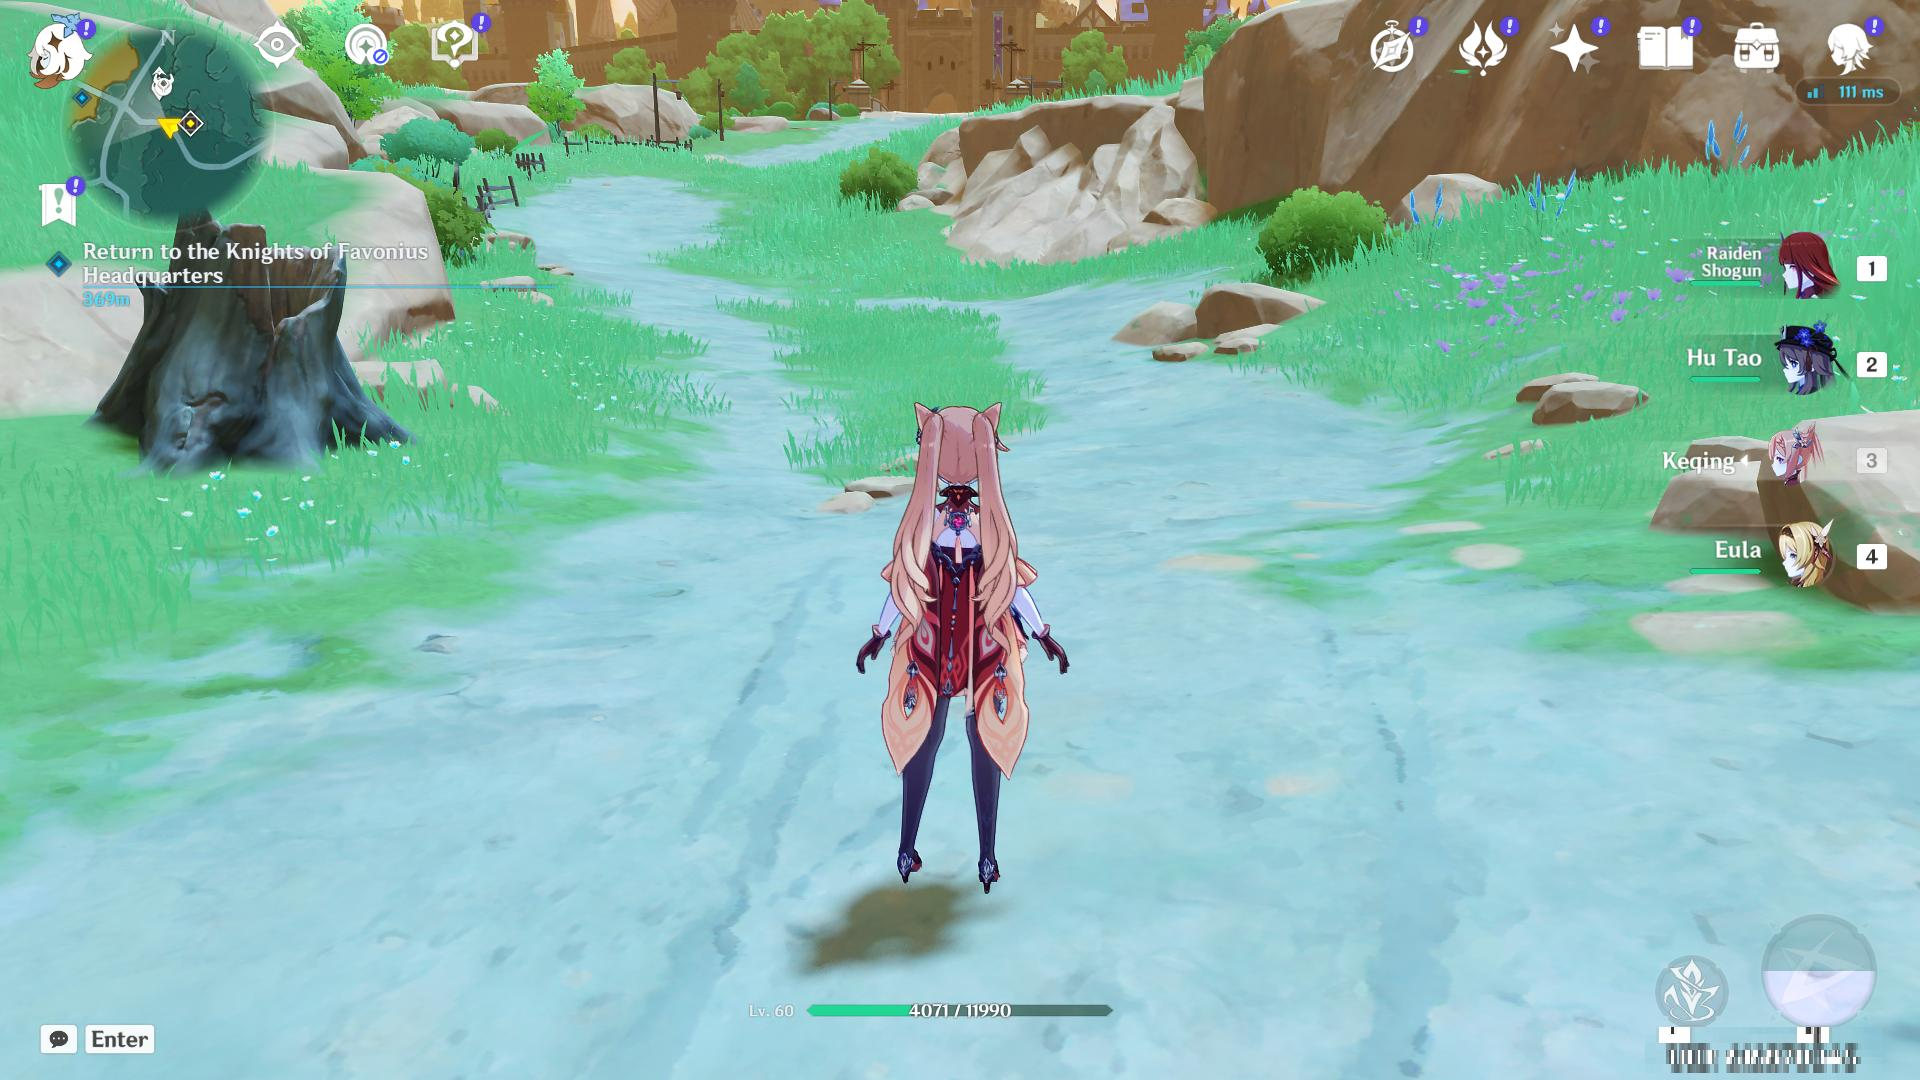

In [79]:
showarray(img)

If we want to understad what is an image in terms of opencv, an image in opencv it is just a simple array, as you can see

In [80]:
print(img)

[[[124 193 150]
  [126 196 152]
  [128 195 153]
  ...
  [131 109  82]
  [128 104  76]
  [128 104  77]]

 [[145 198 166]
  [147 198 168]
  [149 198 168]
  ...
  [128 103  76]
  [126 101  72]
  [126 101  72]]

 [[154 199 173]
  [156 199 172]
  [160 199 175]
  ...
  [124  99  70]
  [124  98  68]
  [124  97  68]]

 ...

 [[161 212 222]
  [161 213 222]
  [160 212 221]
  ...
  [159 210 222]
  [159 209 222]
  [158 209 221]]

 [[158 211 222]
  [158 211 222]
  [160 211 222]
  ...
  [159 210 222]
  [160 210 223]
  [160 210 223]]

 [[158 211 221]
  [158 211 221]
  [159 212 222]
  ...
  [161 212 224]
  [160 211 224]
  [161 211 224]]]


## 1. Simple threshold

The first filter that we want to deal is the  Simple threshold

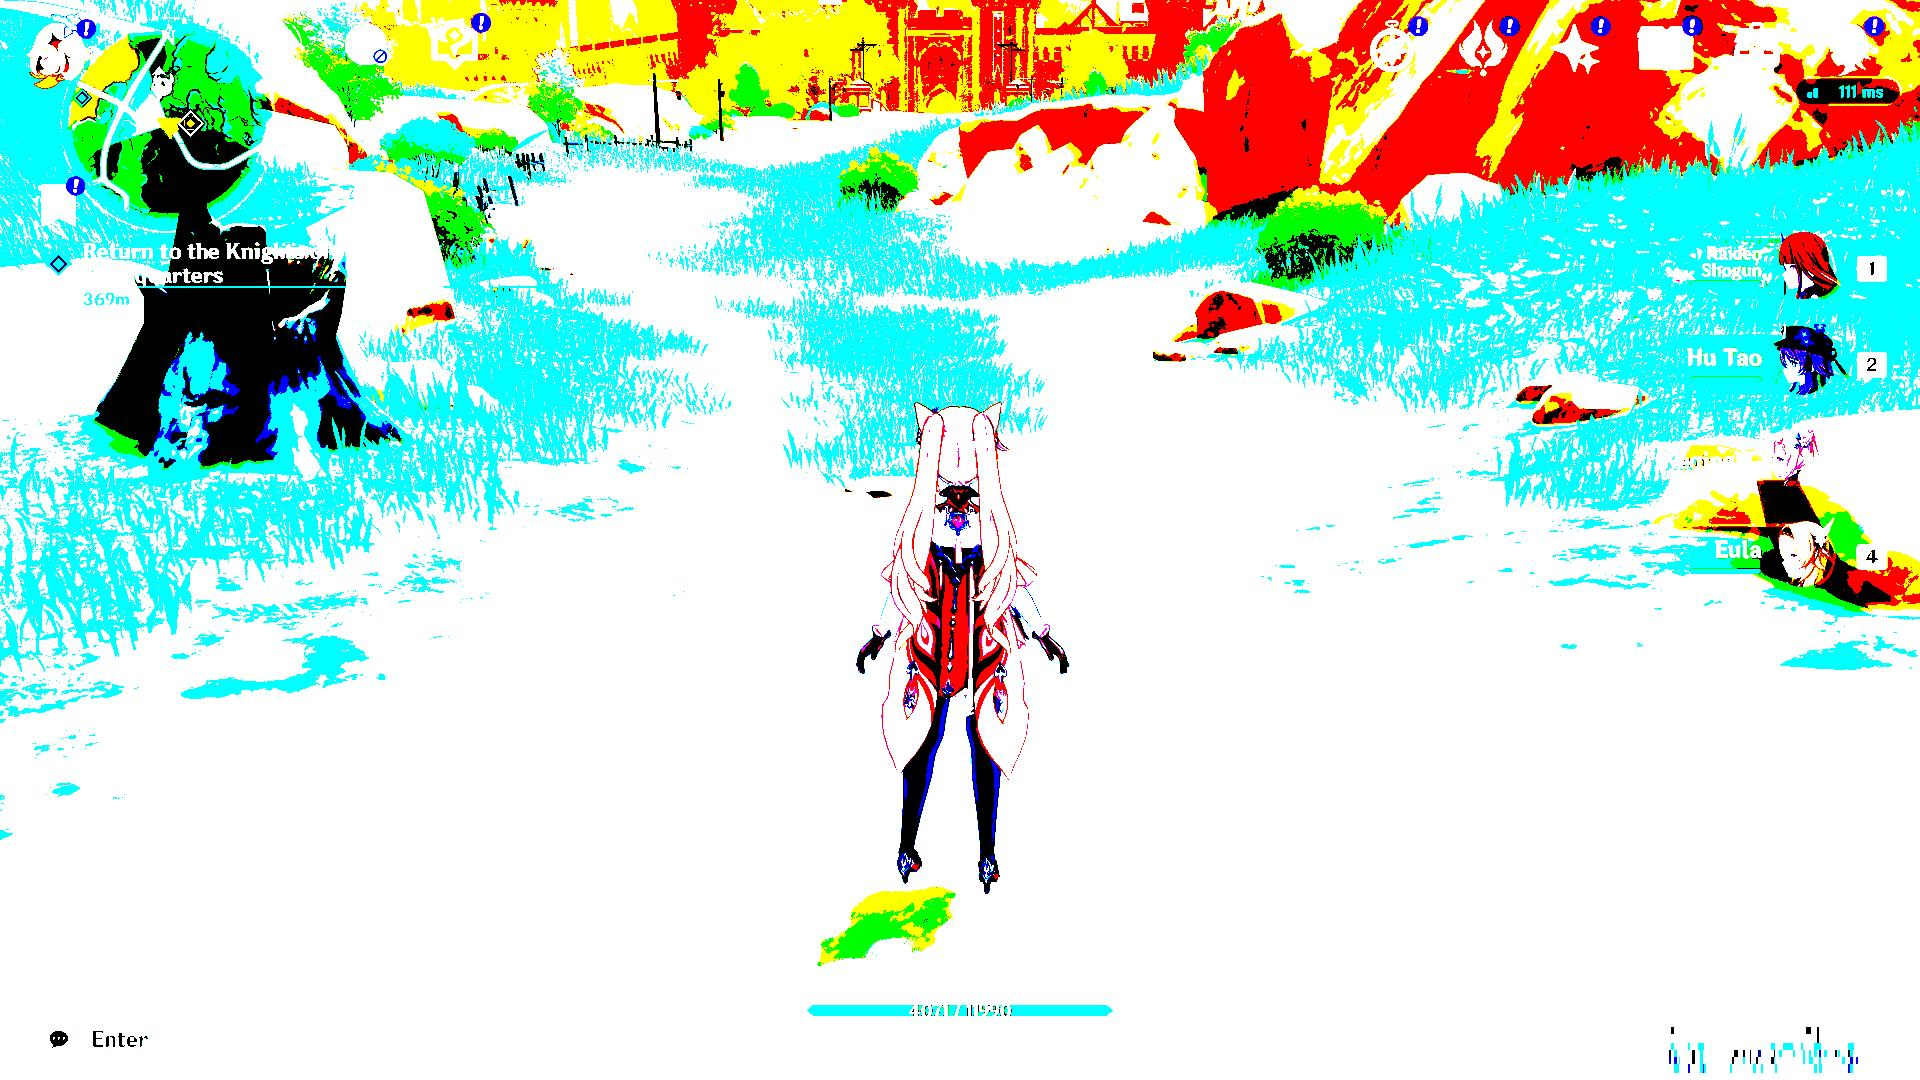

In [81]:
def process_threshold(img):
    # Simple threshold
    ret, processed_img = cv.threshold(img,100,255,cv.THRESH_BINARY) #night/day
    return processed_img
pro_img = process_threshold(img)
showarray(pro_img)

## 2. Median Blur

The second filter that we want to deal is the  median filter is used to suppress image noise.
The edge of the signal can be protected from blurring while noise is filtered out.

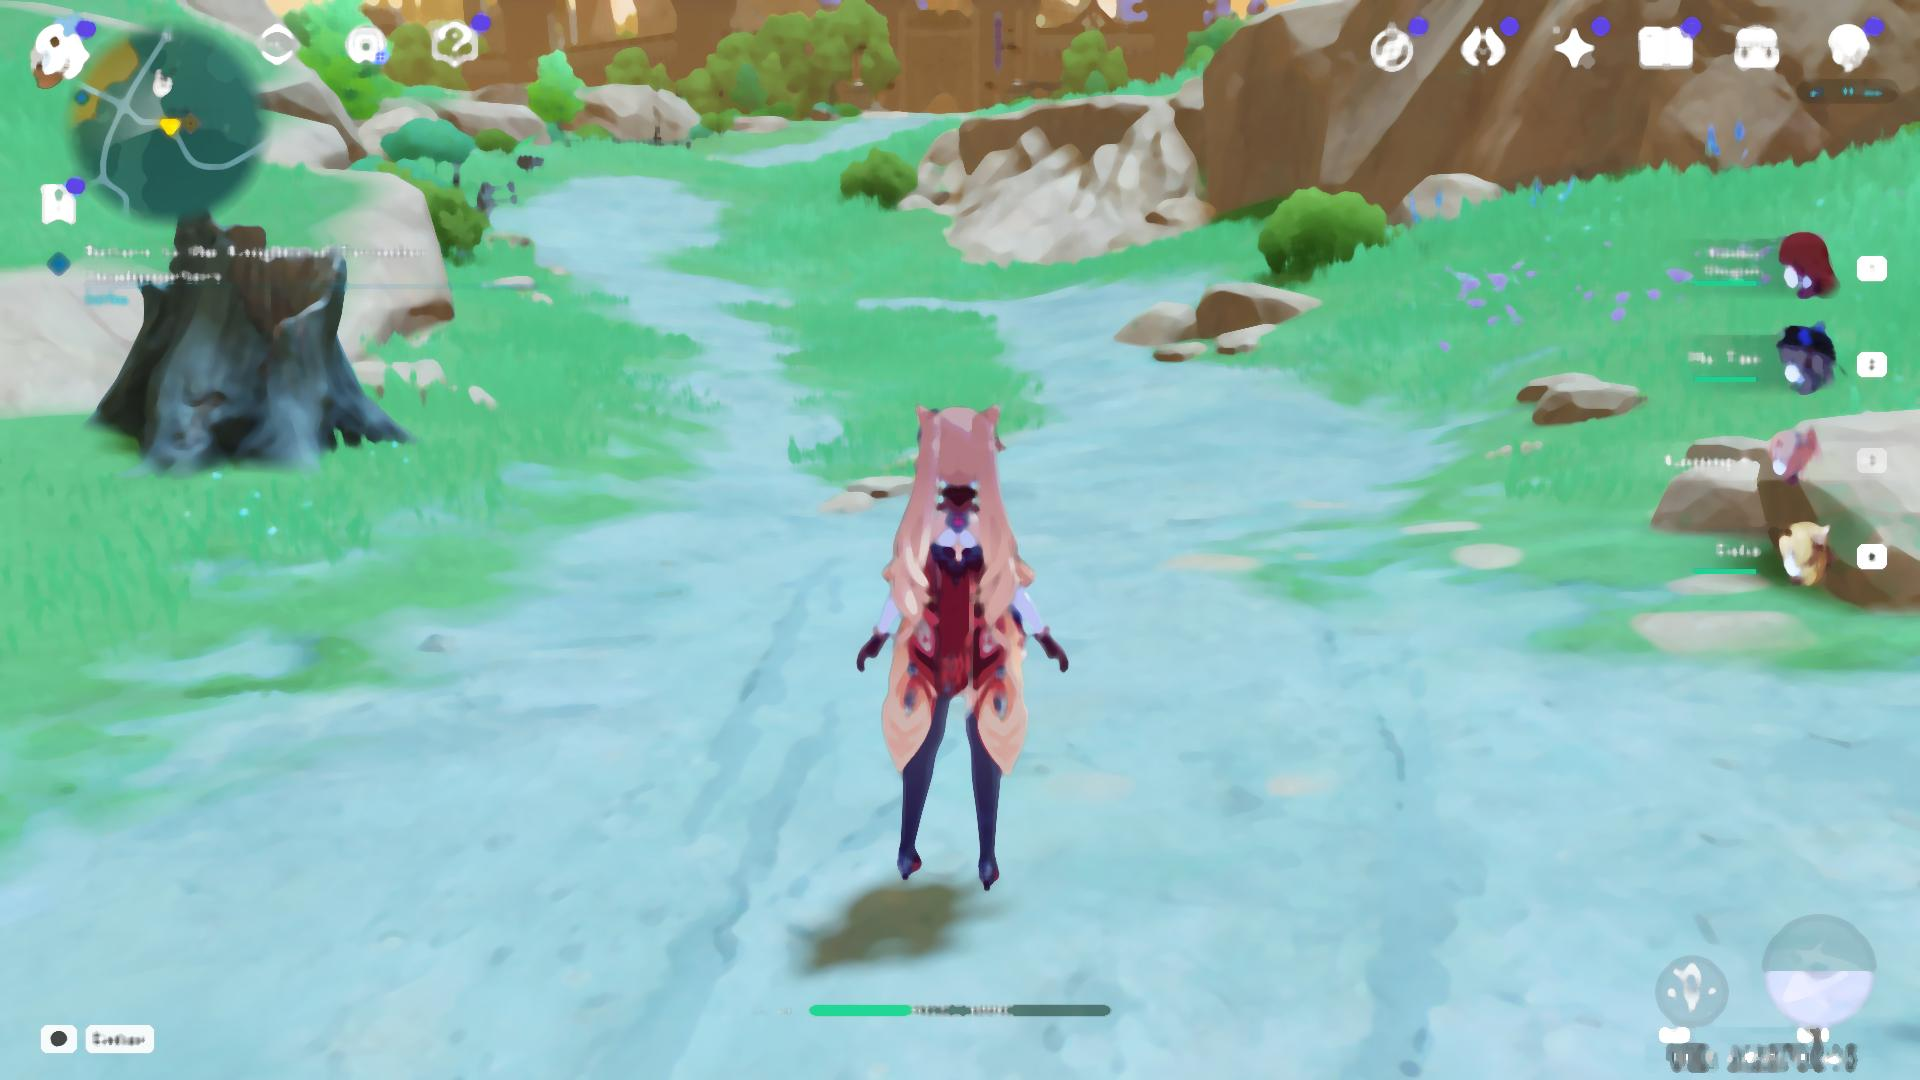

In [82]:
def process_median(img):
    # Median filter is used to suppress image noise. 
    processed_img  = cv.medianBlur(img,9)
    return processed_img
pro_img = process_median(img)
showarray(pro_img)

## 3. Edge detection

The third filter that we want to deal is the Edge detection

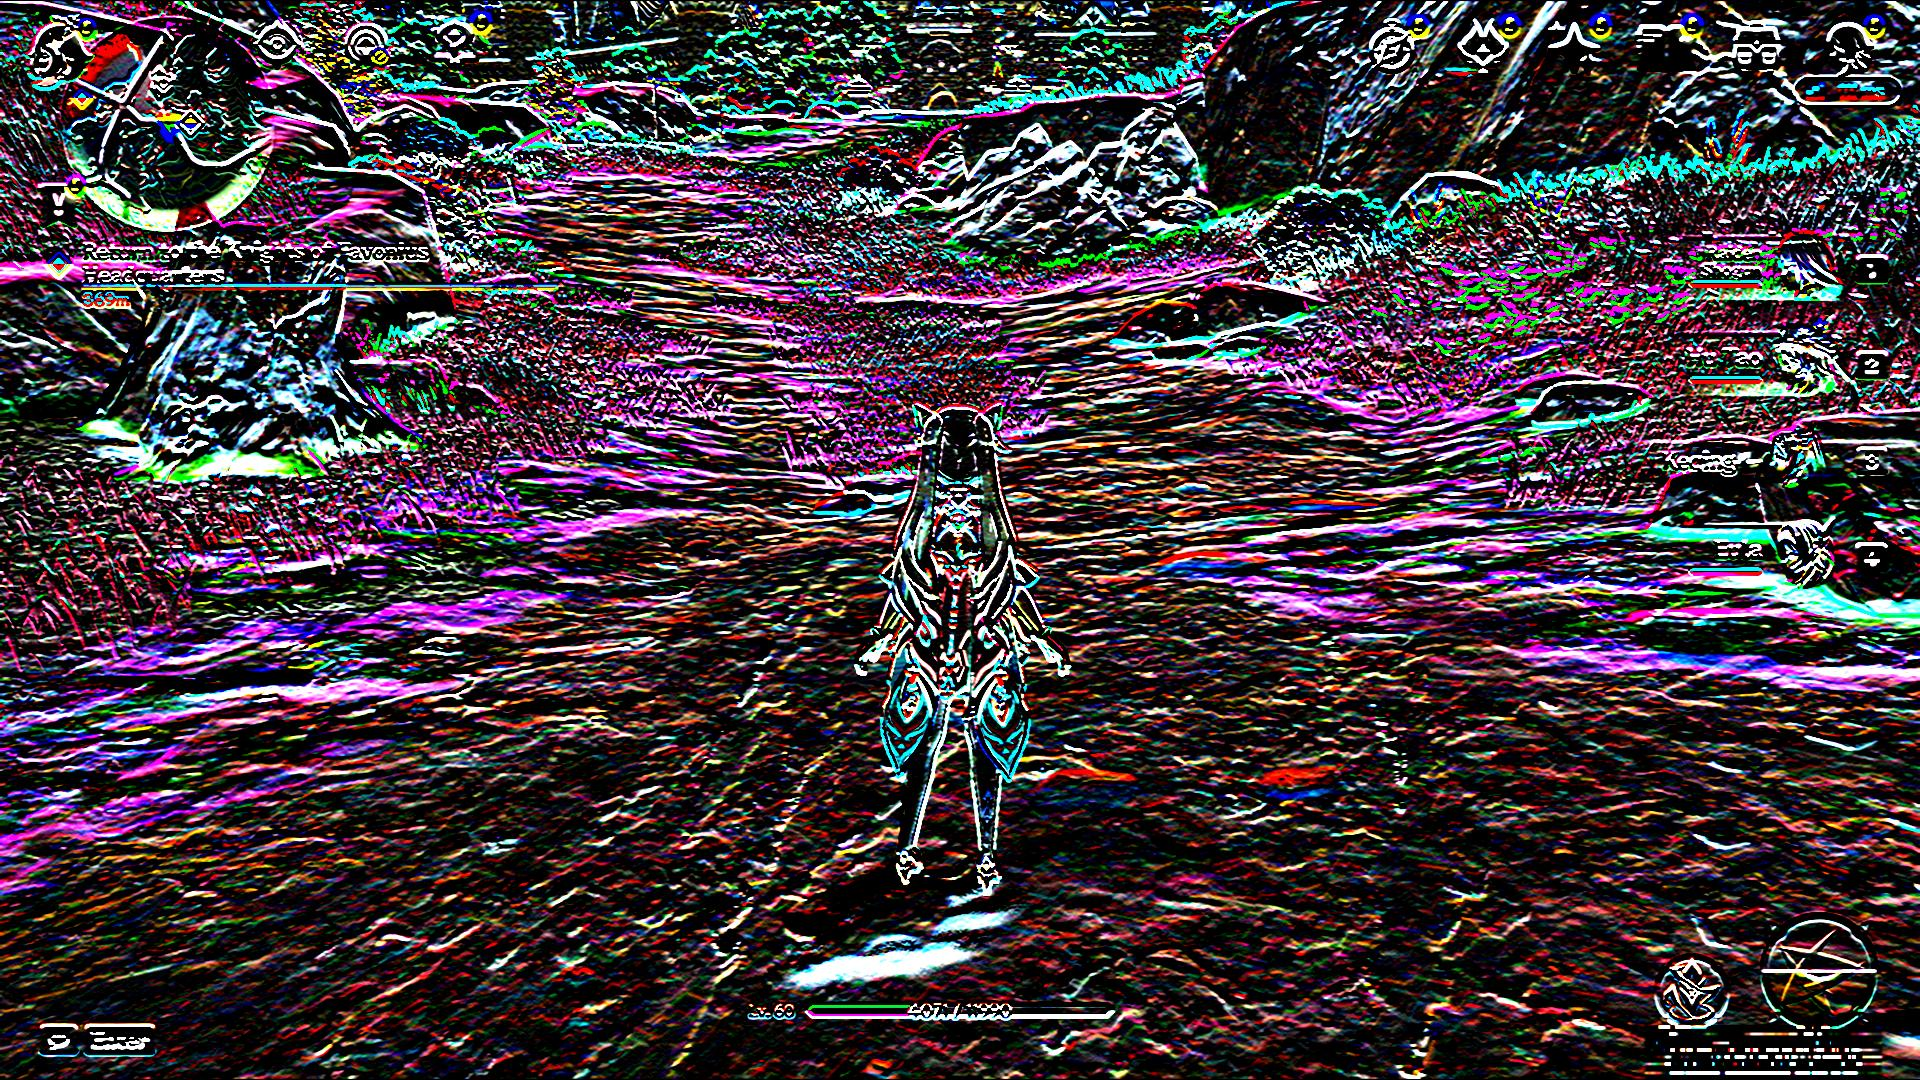

In [83]:
def process_edge(img):
    # edge detection
    processed_img = cv2.Sobel(img,cv2.CV_64F,0 ,1, ksize=5) #Horizontal Gradient
    return processed_img
pro_img = process_edge(img)
showarray(pro_img)

As you can see it a bit complex , how to identify a correct filter to get the appopiate filter.
In addition you can mix of different filters

## 4. Median Blur+ Threshold+ Edge detection(Sobel)

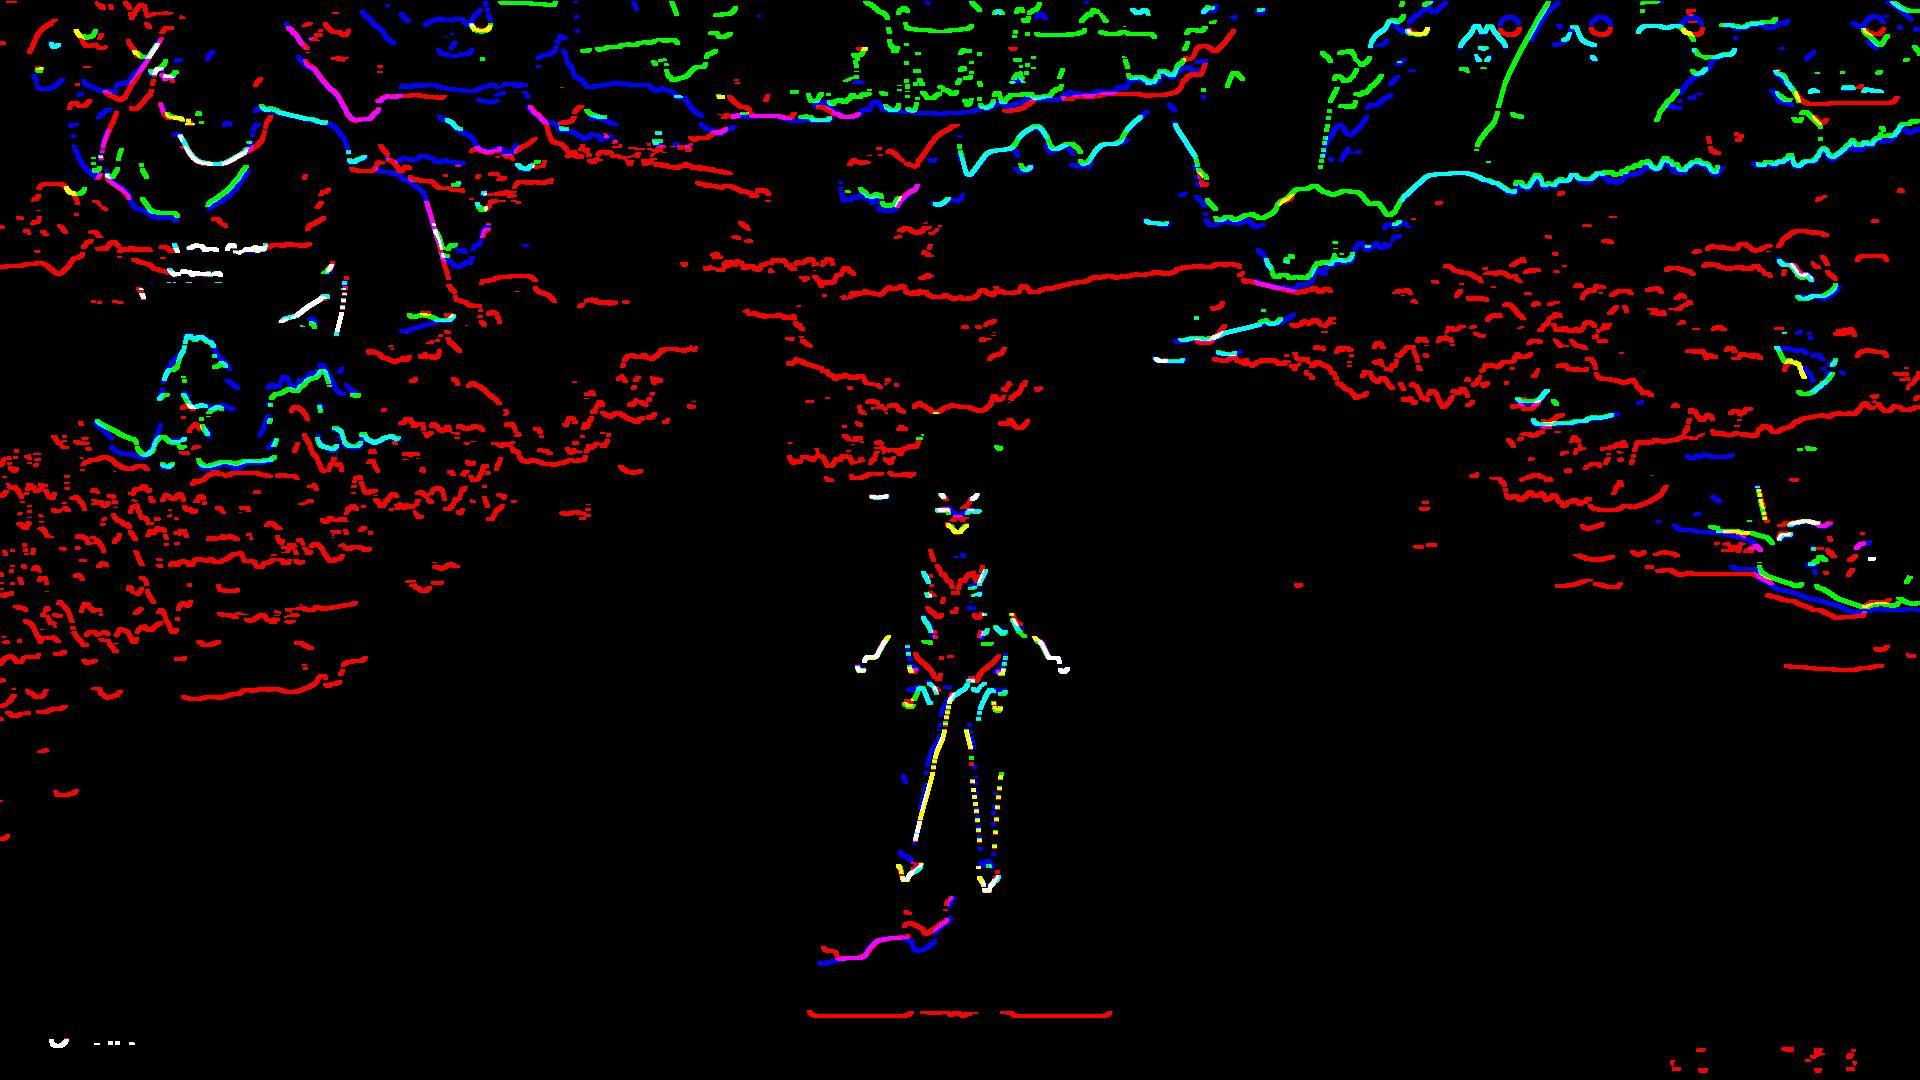

In [84]:
def process_horizontal(img):
    # Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
    img = cv.medianBlur(img,9)
    # Simple threshold
    ret, frame = cv.threshold(img,100,255,cv.THRESH_BINARY) #night/day
    # edge detection
    processed_img = cv2.Sobel(frame,cv2.CV_64F,0 ,1, ksize=5) #Horizontal Gradient
    return processed_img
pro_img = process_horizontal(img)
showarray(pro_img)

## 5. Median Blur+ Threshold+ Edge detection(Canny)

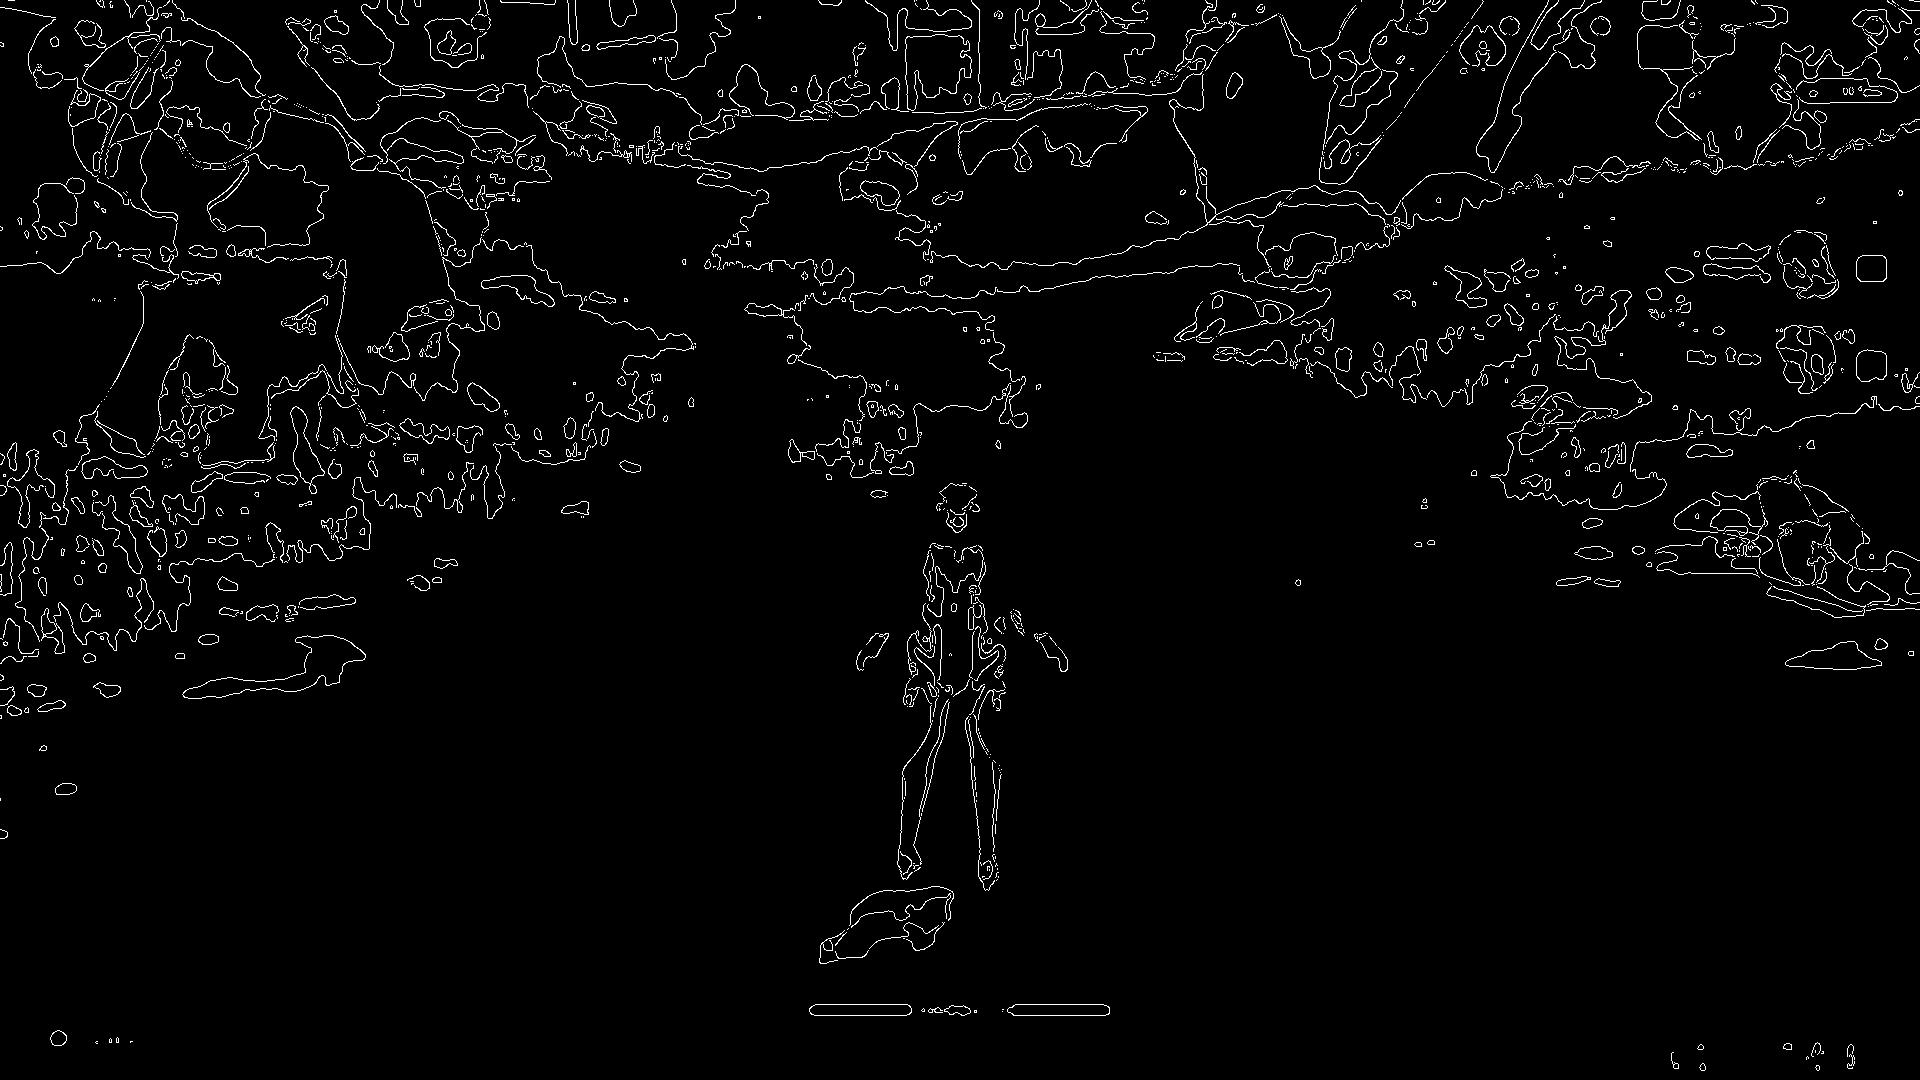

In [85]:
def process_imagen(img):
    # Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
    img = cv.medianBlur(img,9)
    # Simple threshold
    ret, frame = cv.threshold(img,100,255,cv.THRESH_BINARY) #night/day
    # edge detection
    processed_img = cv2.Canny(frame, threshold1 = 200, threshold2=300)
    return processed_img
pro_img = process_imagen(img)
showarray(pro_img)

## 6. Get the red source 

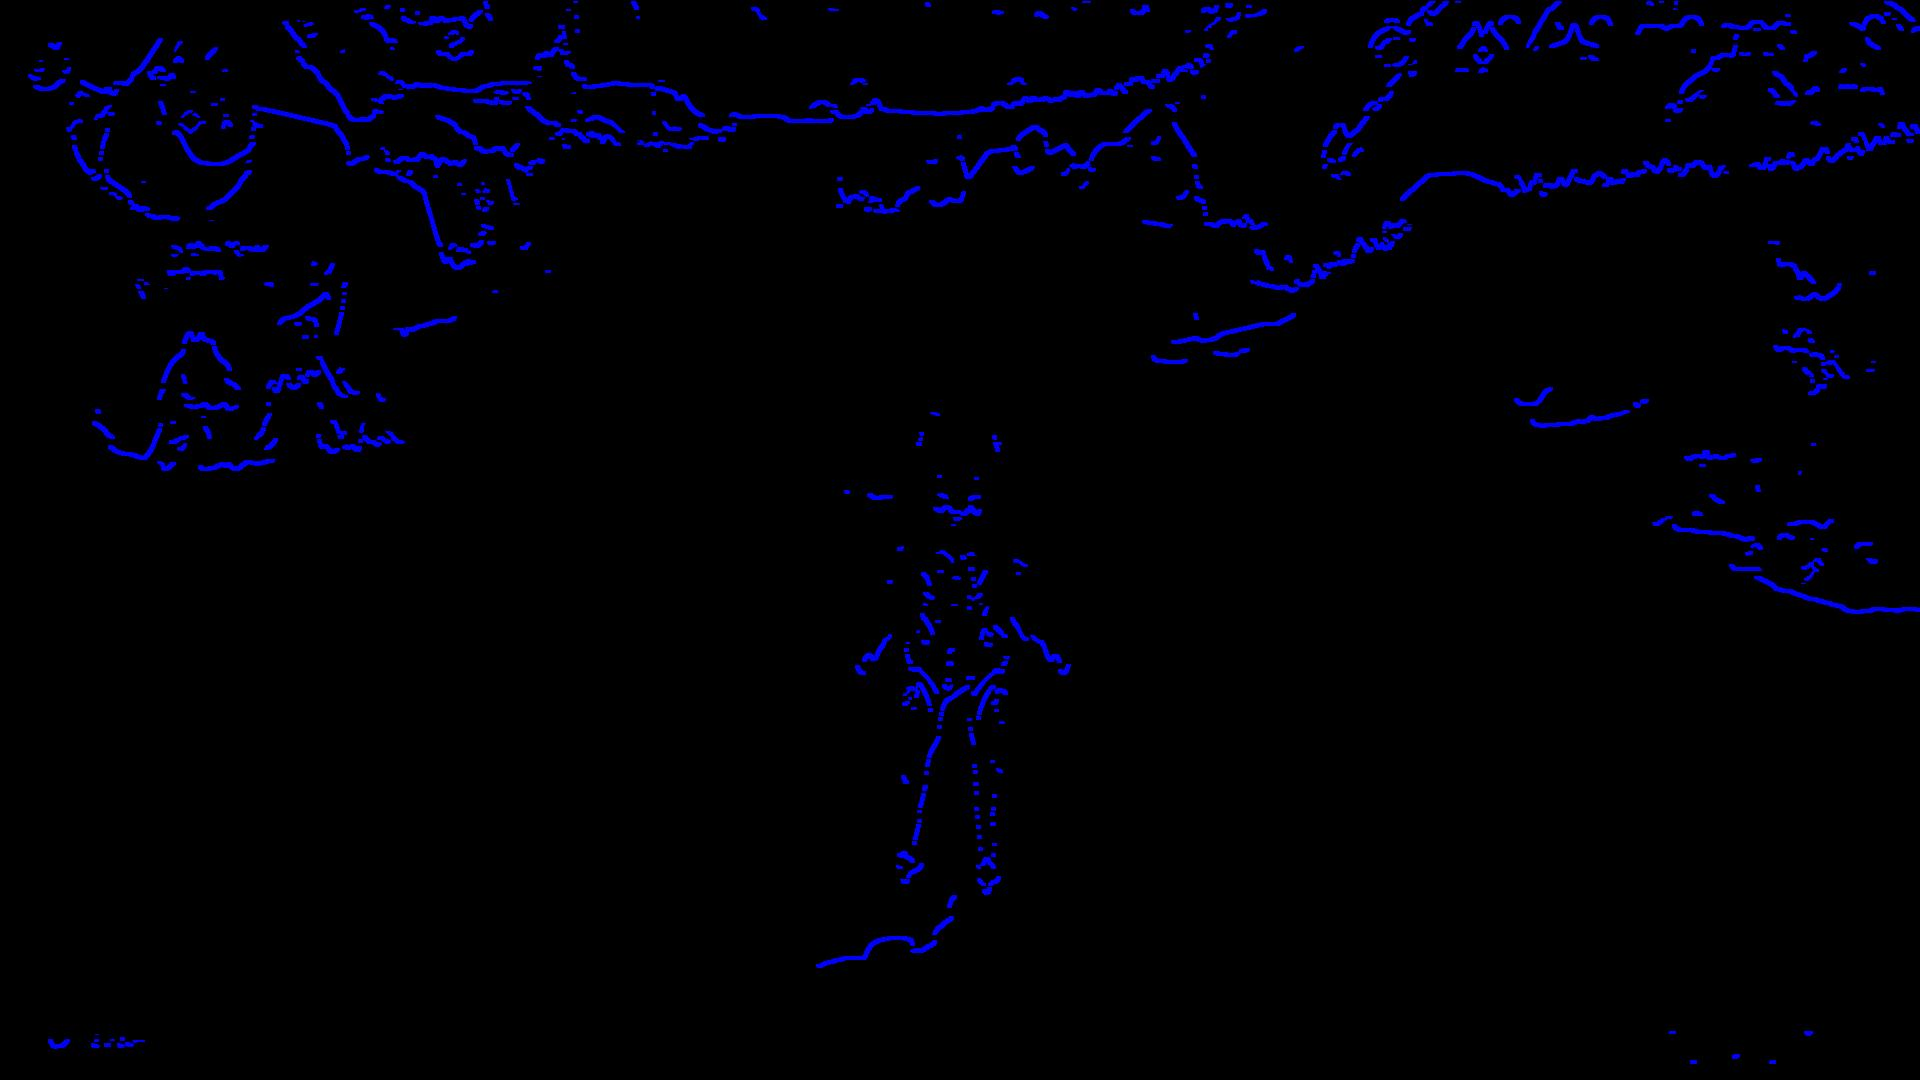

In [86]:
def process_red(img):
    # Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
    img = cv.medianBlur(img,5)
    # Simple threshold
    #ret,th1 = cv.threshold(img,121,255,cv.THRESH_BINARY) #day
    #ret,th1 = cv.threshold(img,61,255,cv.THRESH_BINARY) #night
    ret,th1 = cv.threshold(img,100,255,cv.THRESH_BINARY) #night/day
    frame=th1
    y= cv2.Sobel(frame,cv2.CV_64F,0 ,1, ksize=5) #Horizontal Gradient
    #edge= cv2.Canny(frame, 100, 200)#Edge Detection
    src =y
    #print(src.shape)
    # extract red channel
    red_channel = src[:,:,2]
    # create empty image with same shape as that of src image
    red_img = np.zeros(src.shape)
    #assign the red channel of src to empty image
    red_img[:,:,2] = red_channel
    return red_img
red_img = process_red(img)
showarray(red_img)

### 8. Find the best Thresholding paramter

As you could see there are some parameters that you have to add to the filter that you can identify by doing a loop
with different values of Thresholding paramter

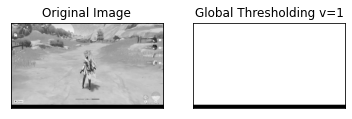

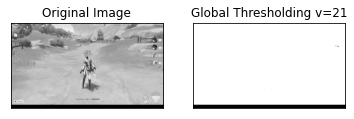

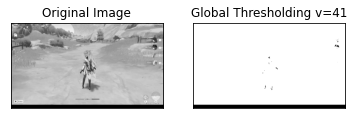

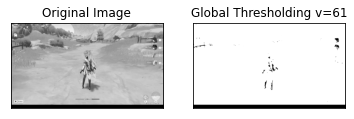

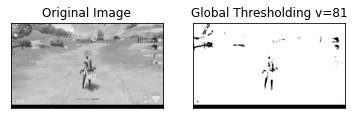

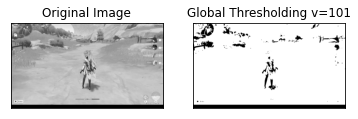

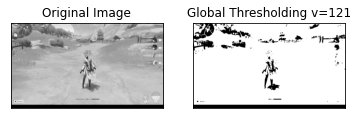

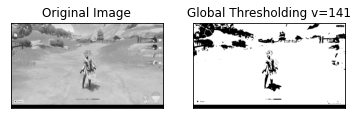

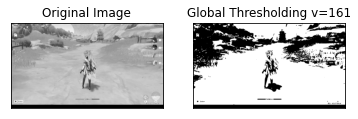

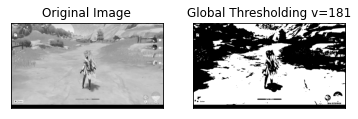

In [87]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#img = cv.imread('day.png',0)
#img= cv.imread('night.png',1)
#img = load('data.npy') #Original

# convert to gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
img = cv.medianBlur(img,5)
# Simple threshold
lst = [i for i in range(1,200+1,20)]
for x in lst:  
    ret,th1 = cv.threshold(img,x,255,cv.THRESH_BINARY)
    plt.imshow(th1,'gray')
    titles = ['Original Image', 'Global Thresholding v='+str(x)]
    images = [img, th1]
    for i in range(2):
        plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

From the previous analysis we could identify that at v=181 you can identify the way of the game during the day

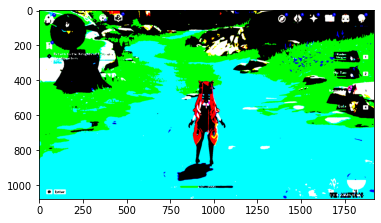

In [90]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
frame= cv.imread('way-day.png',1)
# Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
frame = cv.medianBlur(frame,5)
# Simple threshold
ret,frame = cv.threshold(frame,181,255,cv.THRESH_BINARY)
plt.imshow(frame,'gray')

As you see in the previous picture, the path is depicted with the cyan color.

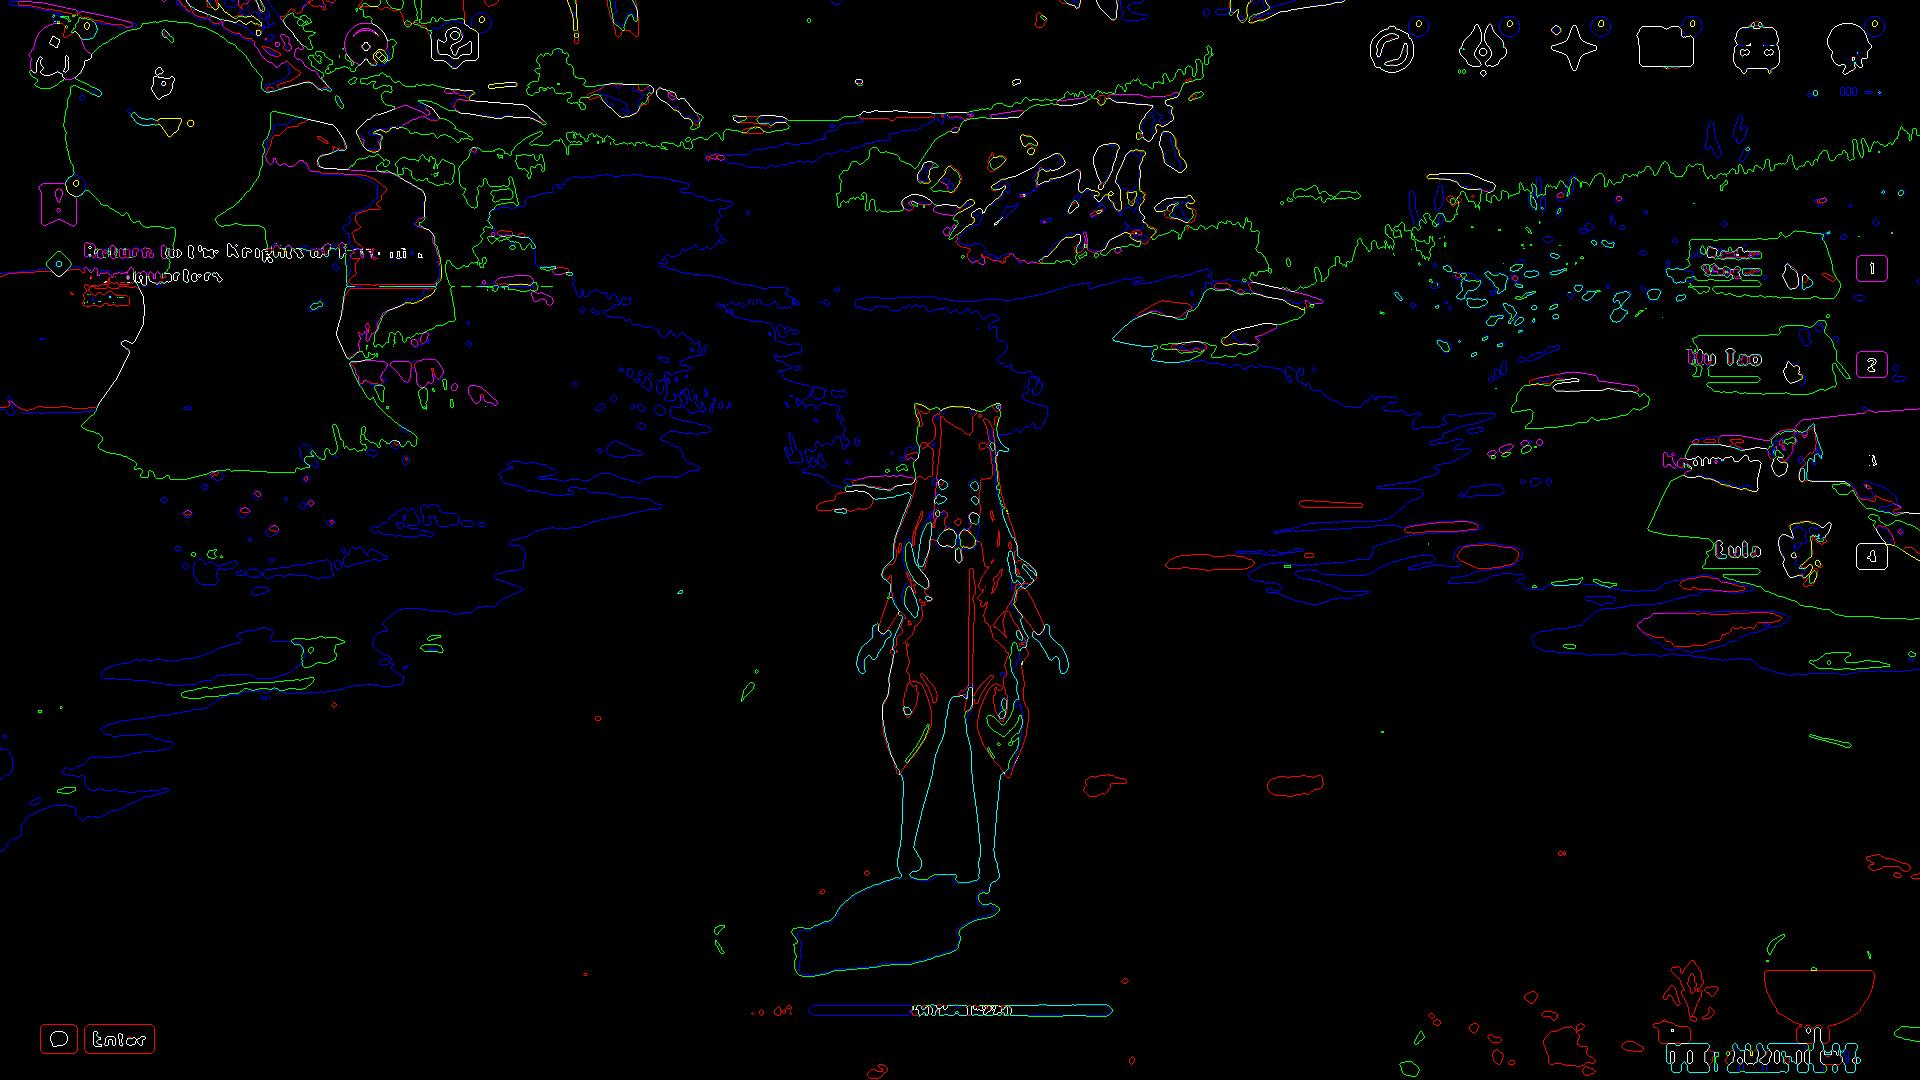

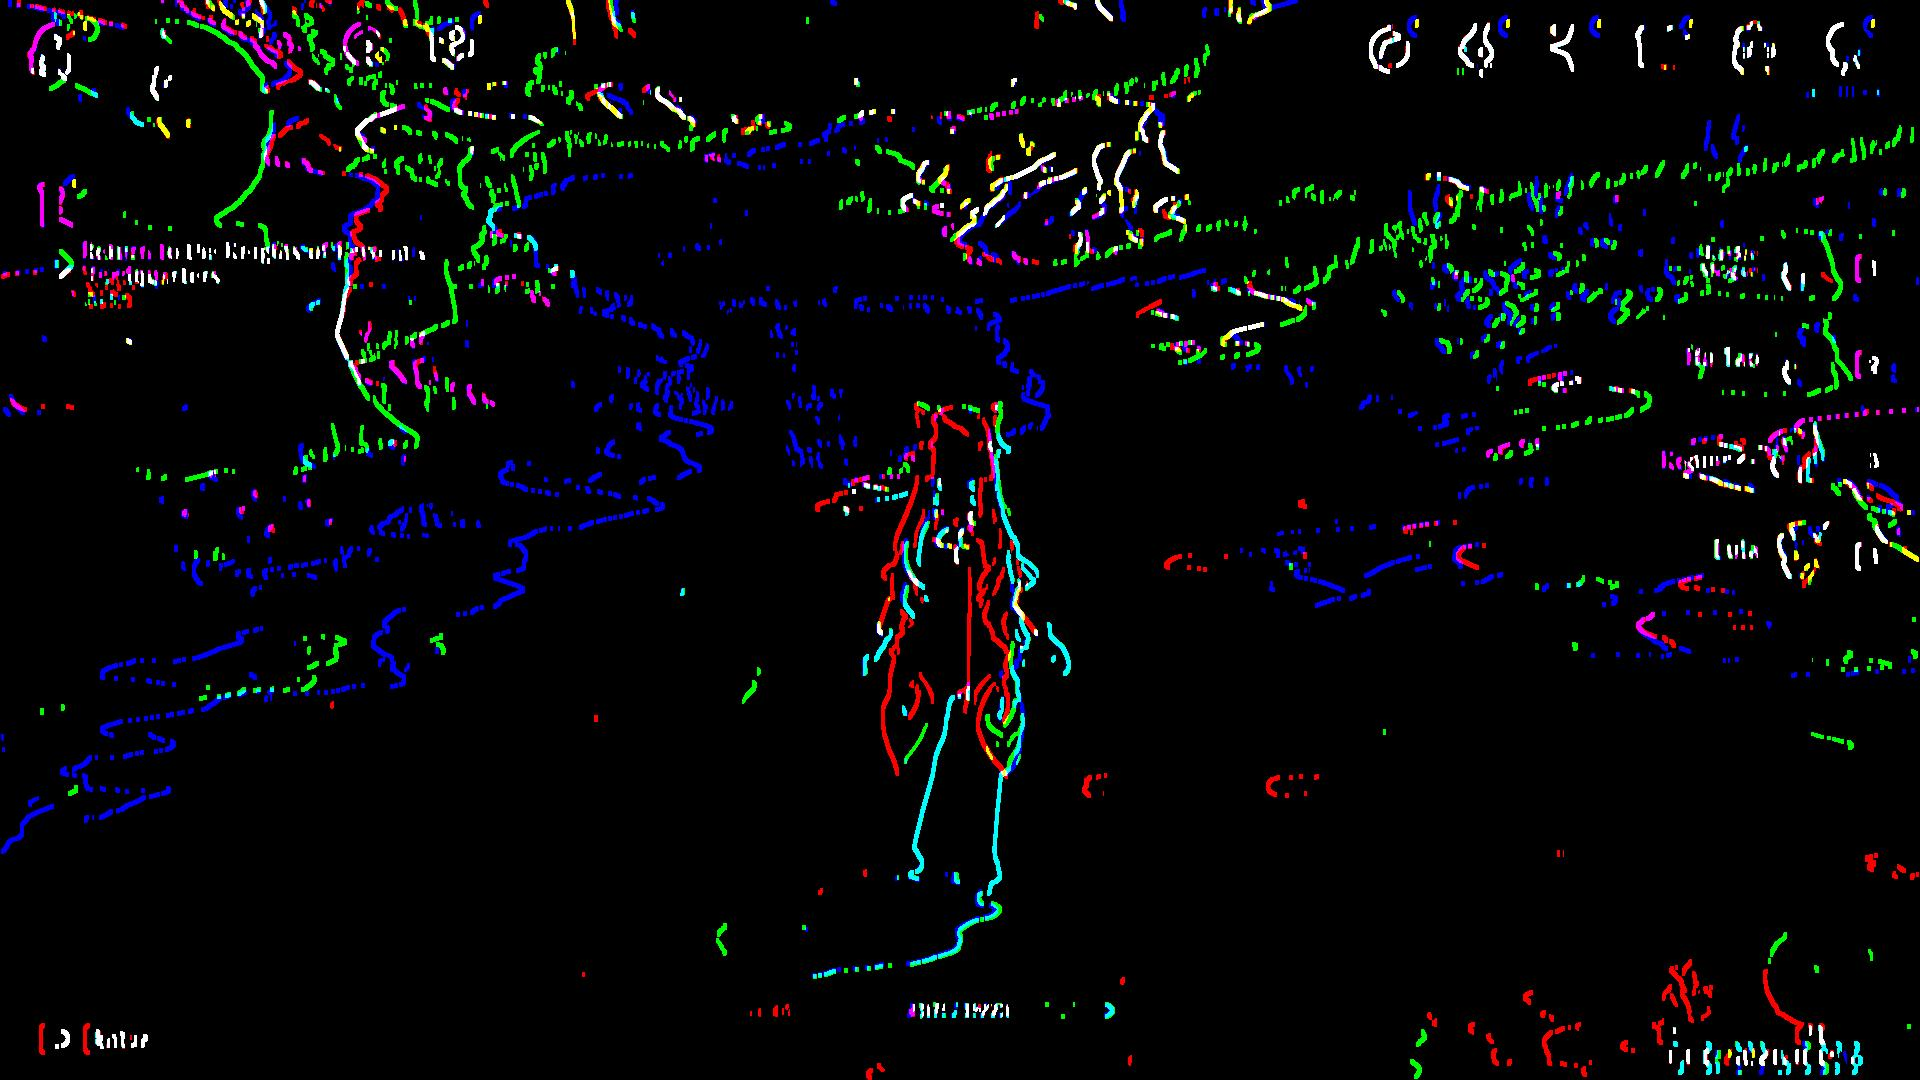

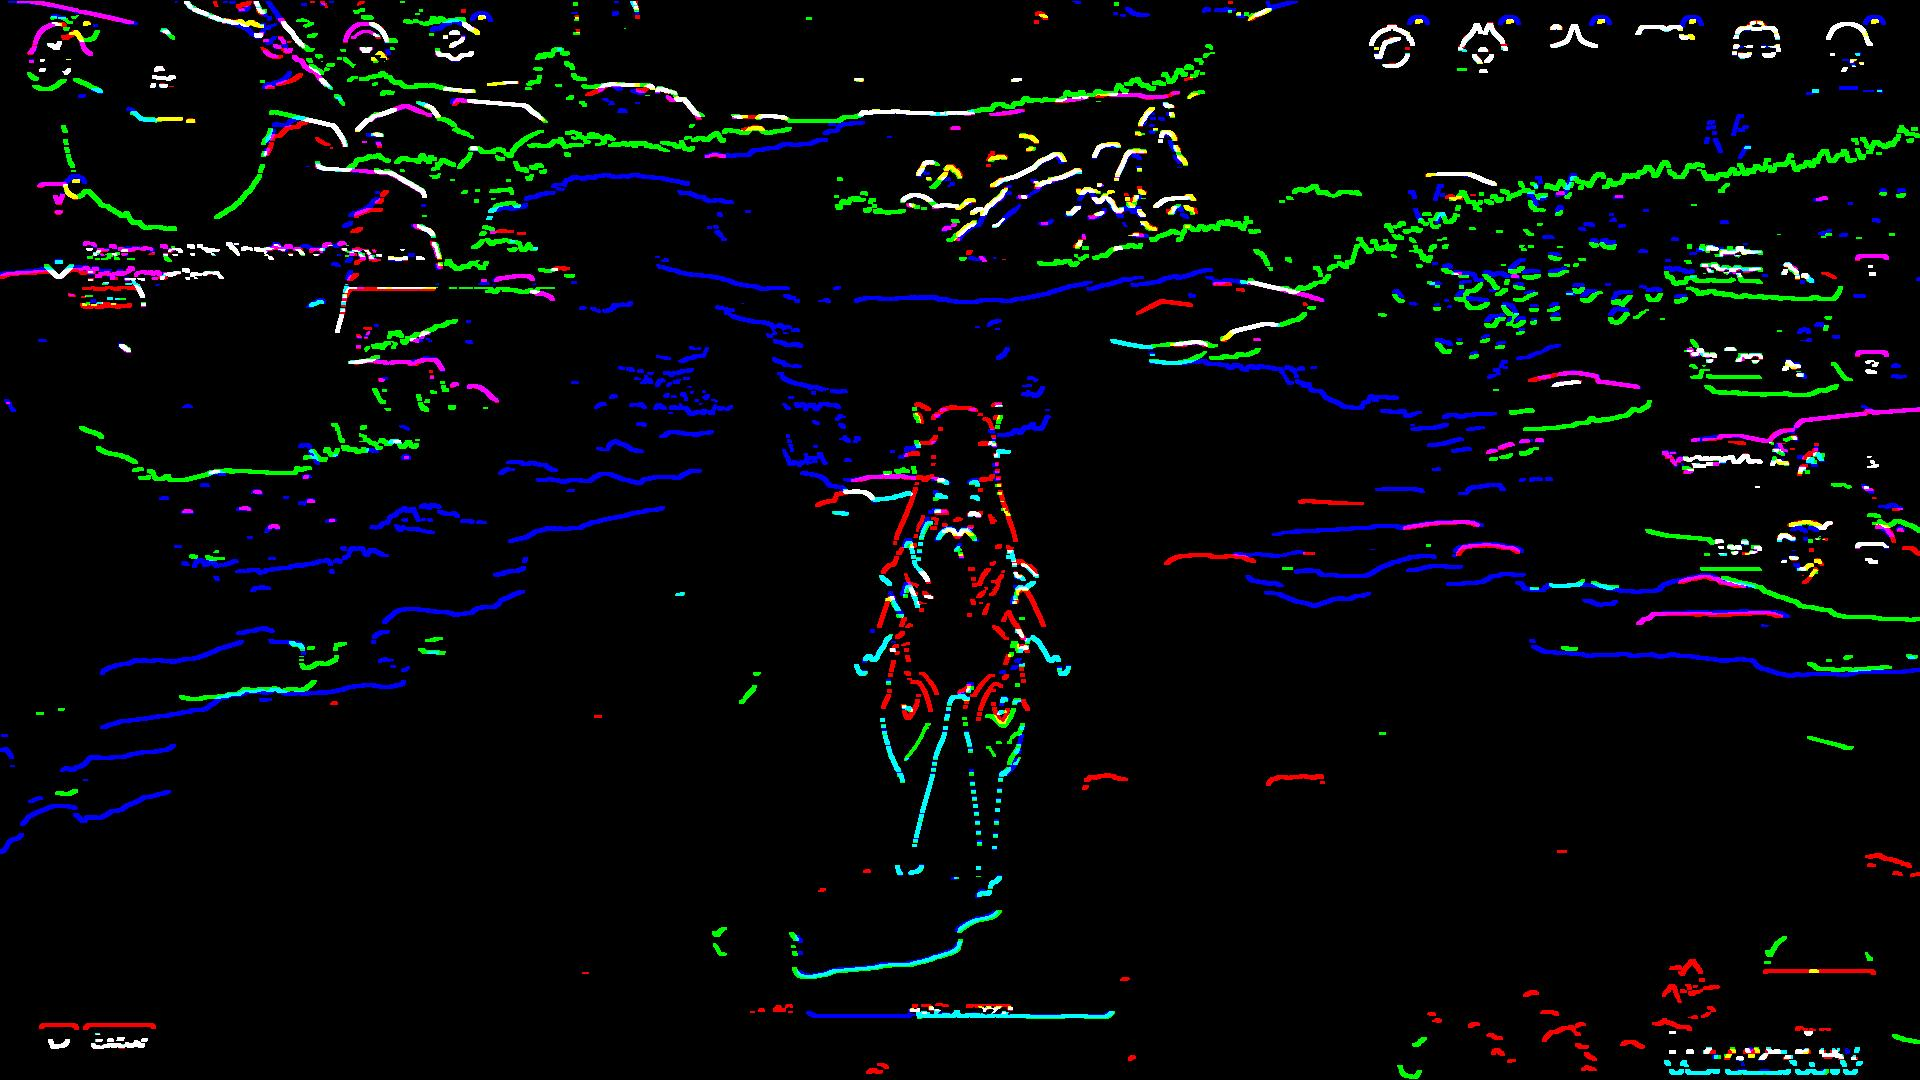

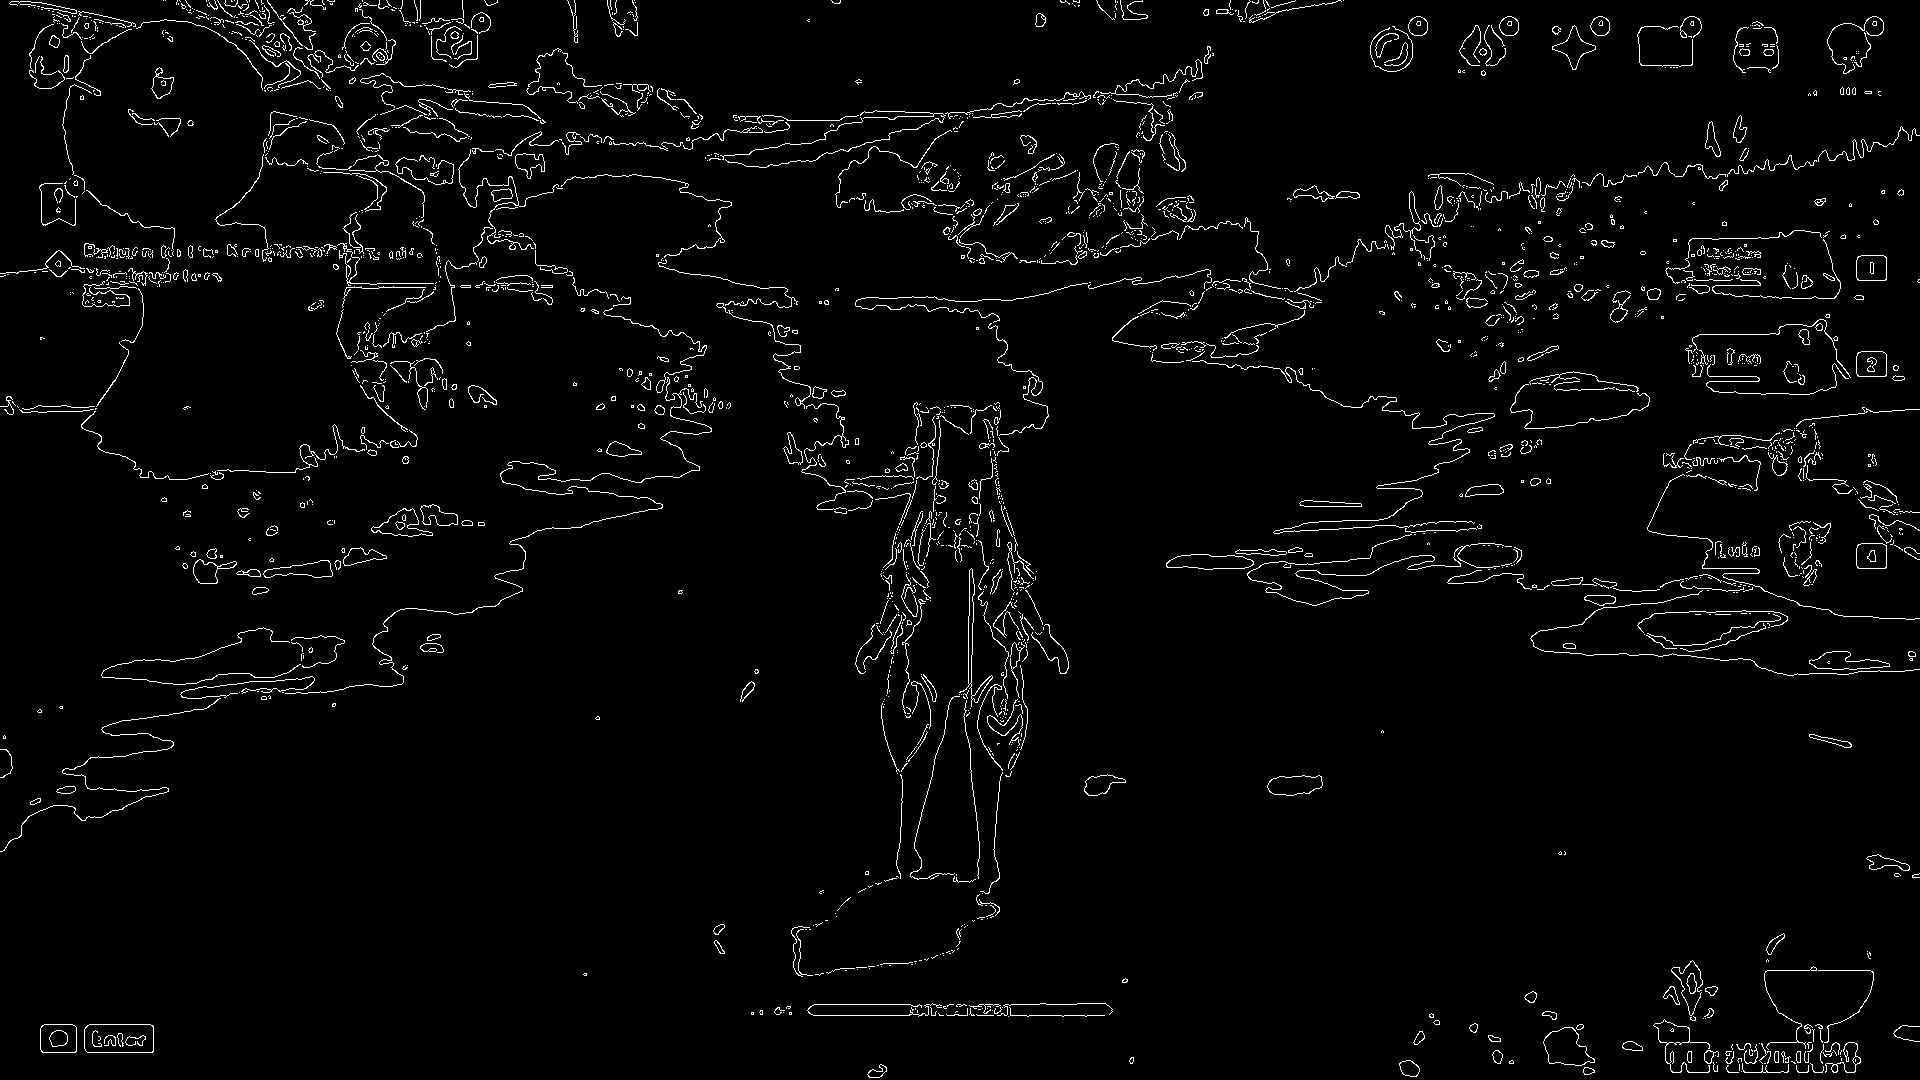

In [91]:
a= cv2.Laplacian(frame,cv2.CV_64F) #Laplacian
x= cv2.Sobel(frame,cv2.CV_64F,1 ,0, ksize=5)#Vertical Gradient
y= cv2.Sobel(frame,cv2.CV_64F,0 ,1, ksize=5) #Horizontal Gradient
edge= cv2.Canny(frame, 181, 200)#Edge Detection
showarray(a)
showarray(x)
showarray(y)
showarray(edge)

## NIGHT WAY IDENTIFICATION

For the night unfortunatelly the filters does not match as the day ones. So we need to find new parameters for the night.
At the end we should develop a function that find the best threshold parameter depending the weather conditions.

In [92]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from numpy import load
# load array
img = cv.imread('way-night.png',1)

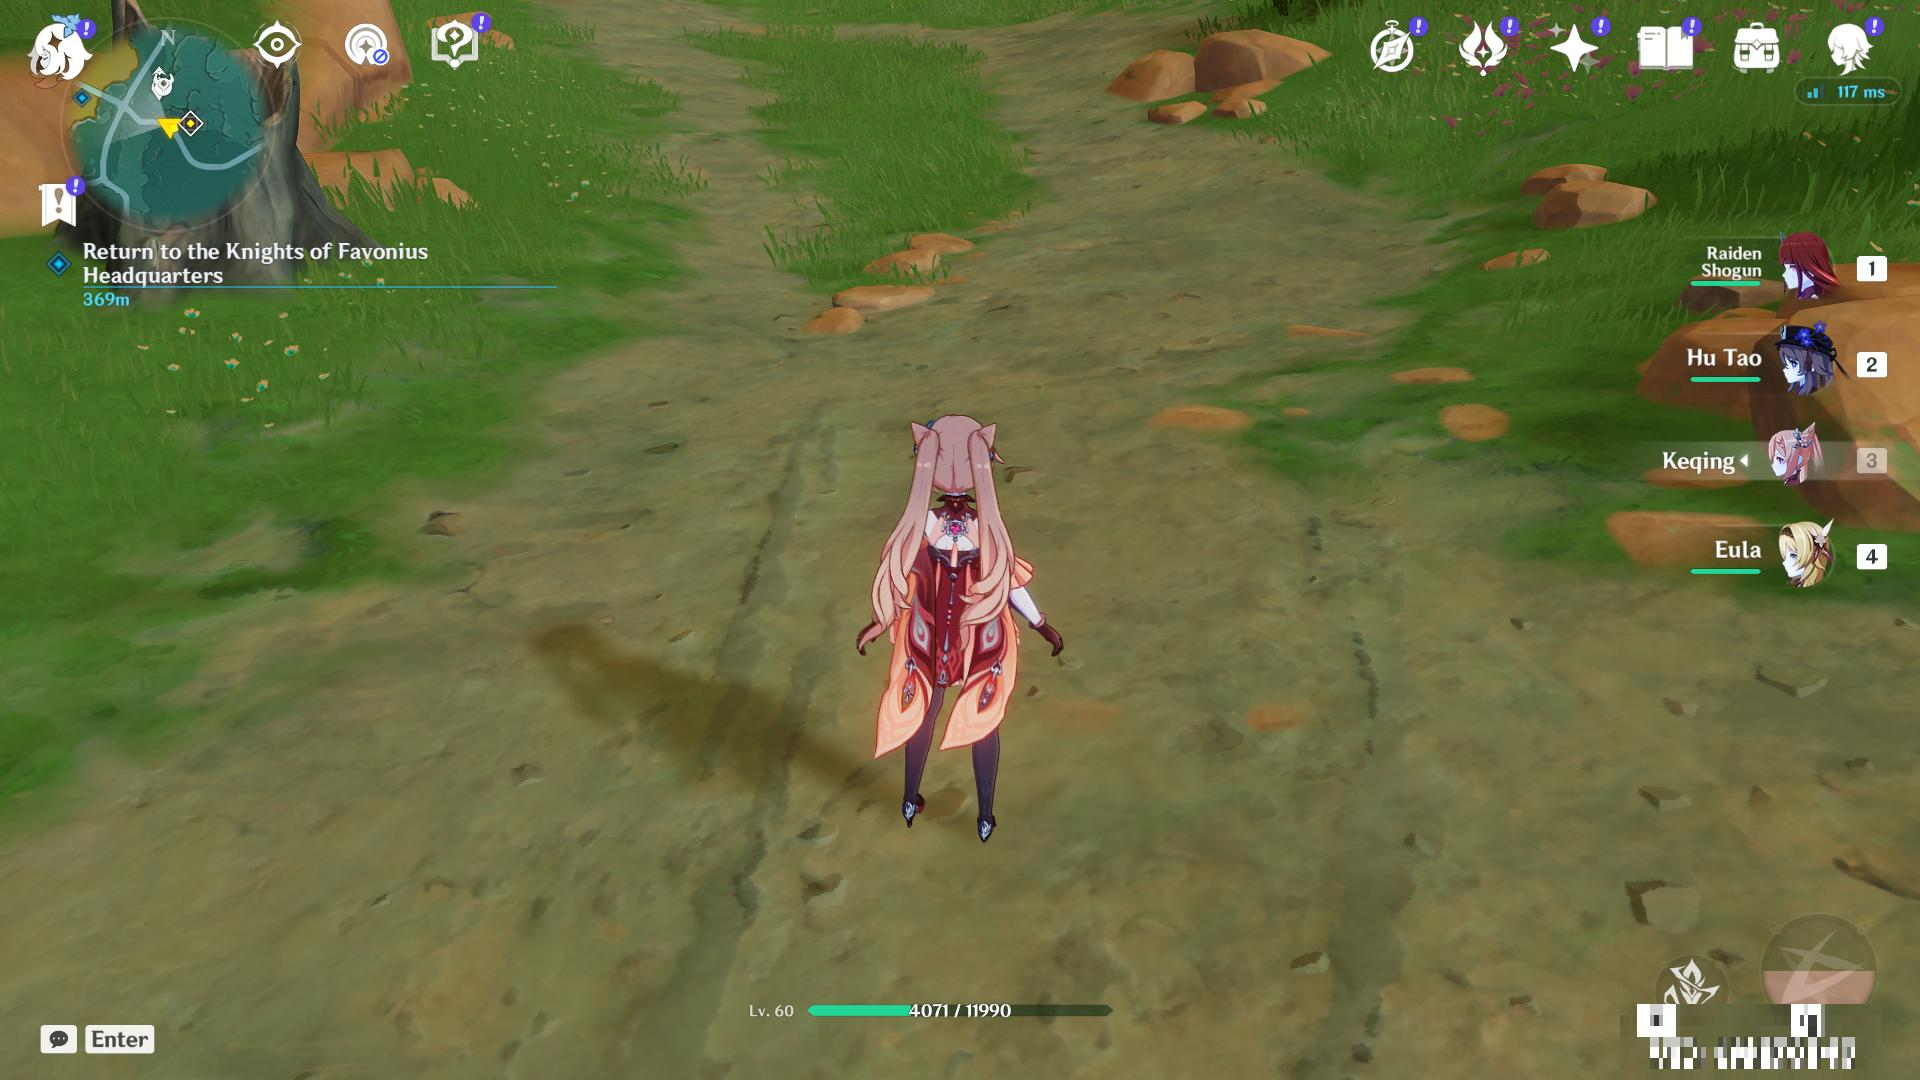

In [93]:
showarray(img)

The first thing that want to do is identify the way where you are walking.
So first we need to identify it

## 9 K-means color quantization

Let is use a method to reduce the number of colors of the picture by using the color quantization procedure

In [98]:
import cv2
import numpy as np
def kmeans_color_quantization(image, clusters=4, rounds=1):
    h, w = image.shape[:2]
    samples = np.zeros([h*w,3], dtype=np.float32)
    count = 0

    for x in range(h):
        for y in range(w):
            samples[count] = image[x][y]
            count += 1

    compactness, labels, centers = cv2.kmeans(samples,
            clusters, 
            None,
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
            rounds, 
            cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    return res.reshape((image.shape))

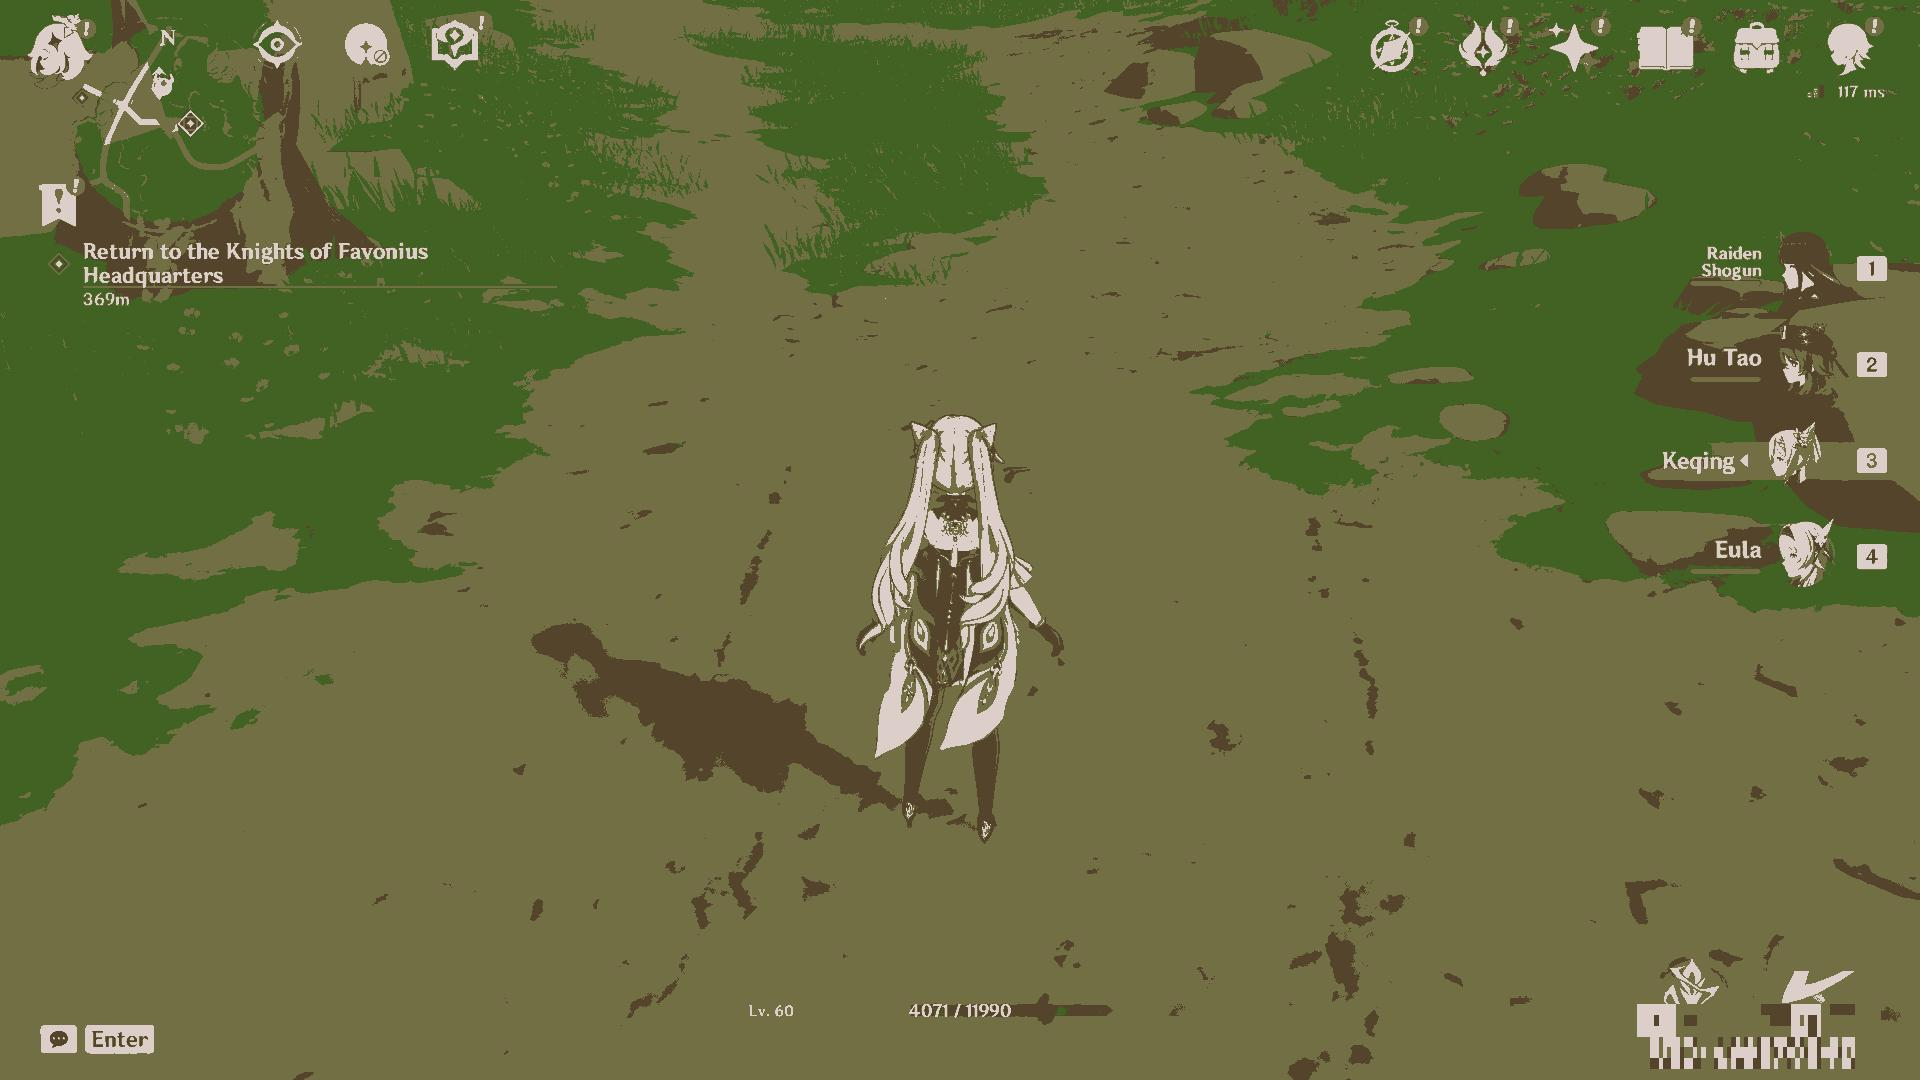

In [99]:
image = cv2.imread('way-night.png')
result = kmeans_color_quantization(image, clusters=4)
showarray(result)
#cv2.imshow('result', result)
#cv2.waitKey()

In [19]:
# declare lists
numbers = []
cubes = []
# start and end numbers
start = 1 
end = 10 
# run a loop from start to end+1 
for count in range (start, end+1) :
    numbers.append (count)
    cubes.append (count**3)
# print the lists
print("numbers: ",numbers)
print("cubes  : ",cubes)

numbers:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cubes  :  [1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]


## 9. Reduce color space

Let us consider reduction to 8 colors

In [104]:
import numpy as np
import cv2 as cv
def is_cube(n):
    cbrt = np.cbrt(n)
    return cbrt ** 3 == n, int(cbrt)
def reduce_color_space(img, n_colors=8):
    n_valid, cbrt = is_cube(n_colors)
    if not n_valid:
        print("n_colors should be a perfect cube")
        return
    n_bits = int(np.log2(cbrt))
    if n_bits > 8:
        print("Can't generate more colors")
        return
    bitmask = int(f"{'1' * n_bits}{'0' * (8 - n_bits)}", 2)
    return img & bitmask

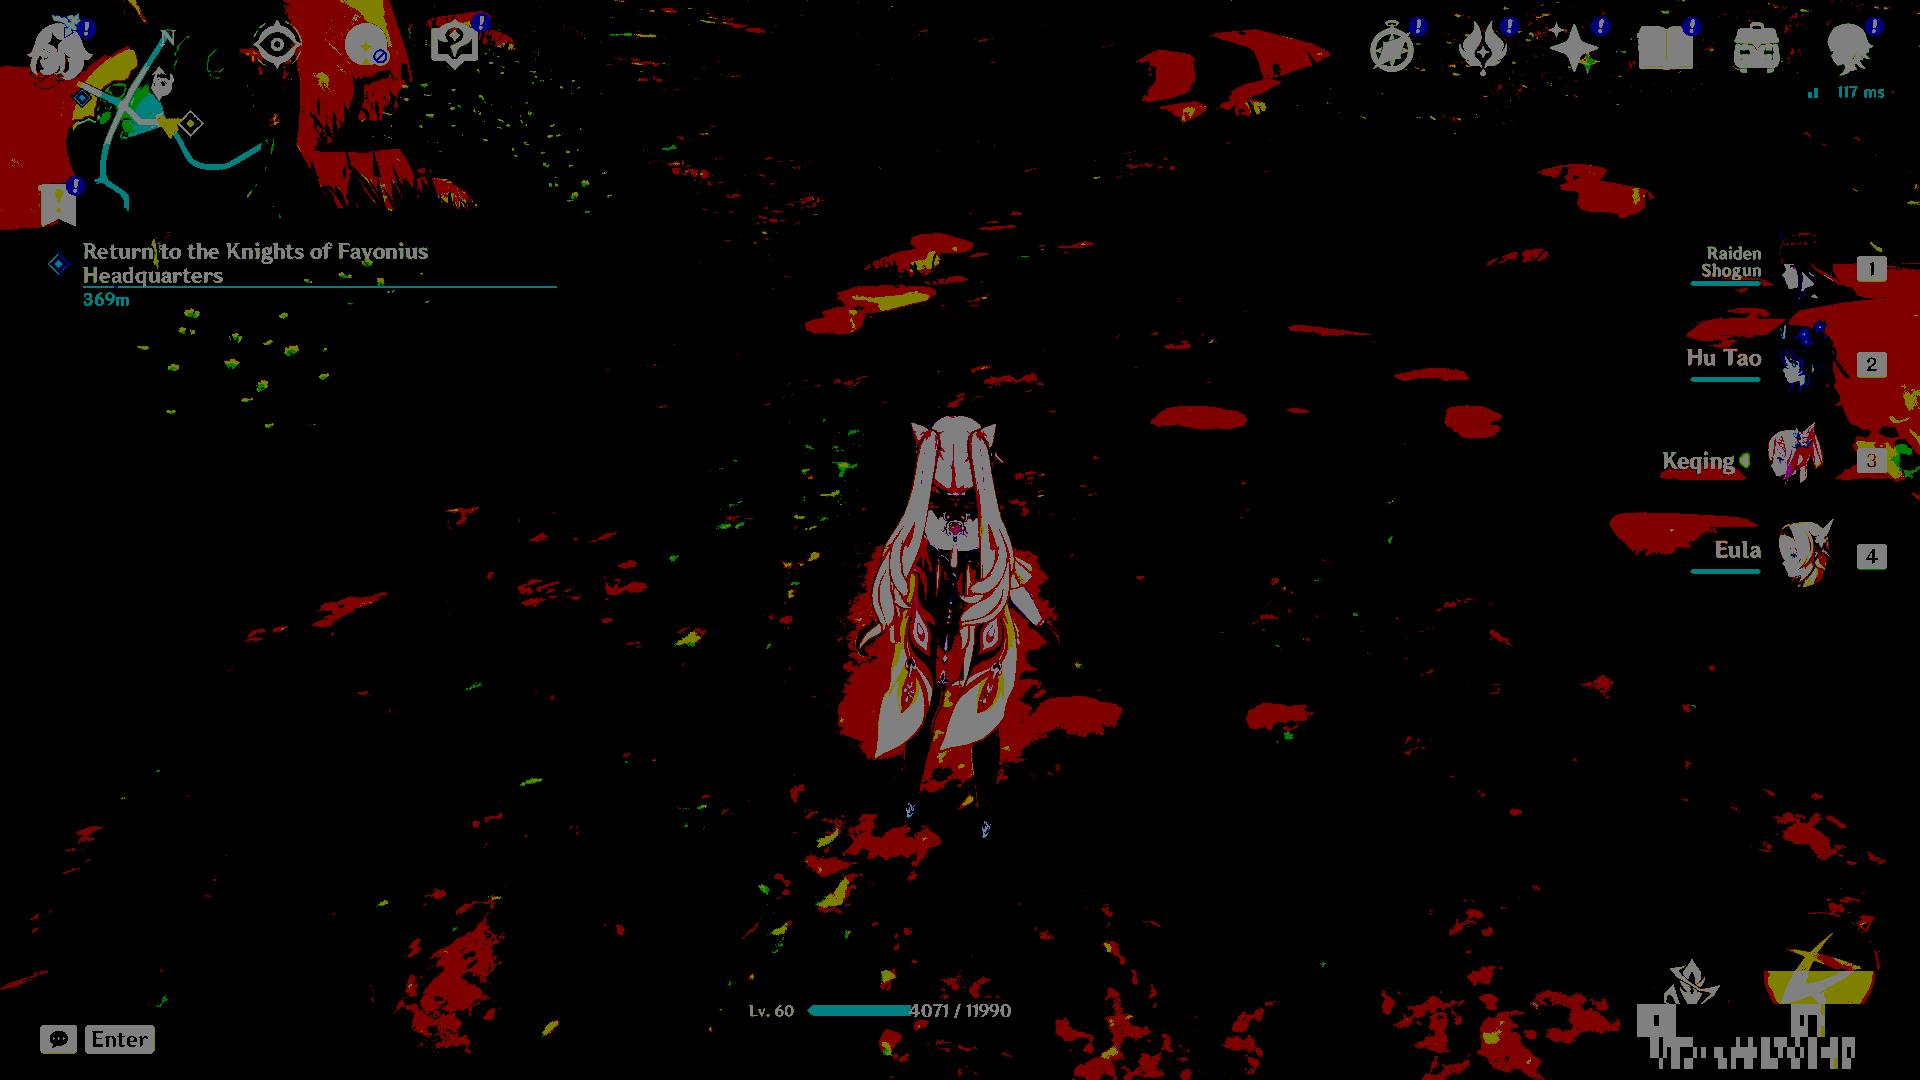

In [105]:
img = cv.imread("way-night.png")
img_reduced=reduce_color_space(img)
showarray(img_reduced)
#cv.imshow("orig", img)
#cv.imshow("reduced", reduce_color_space(img))
#cv2.waitKey(0)
#cv2.destroyAllWindows()


## 10.  Color reduction with sklearn

In [112]:
# import the necessary packages
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import argparse
import cv2

In [113]:
# load the image and grab its width and height

In [114]:
image = cv2.imread('way-night.png')
#image = cv2.imread('way-day.png')
(h, w) = image.shape[:2]

 convert the image from the RGB color space to the L*a*b*
 color space -- since we will be clustering using k-means
 which is based on the euclidean distance, we'll use the
 L*a*b* color space where the euclidean distance implies
 perceptual meaning

In [115]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

In [116]:
# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [117]:
clusters=4

In [118]:
# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = clusters)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

In [119]:
# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))

In [120]:
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

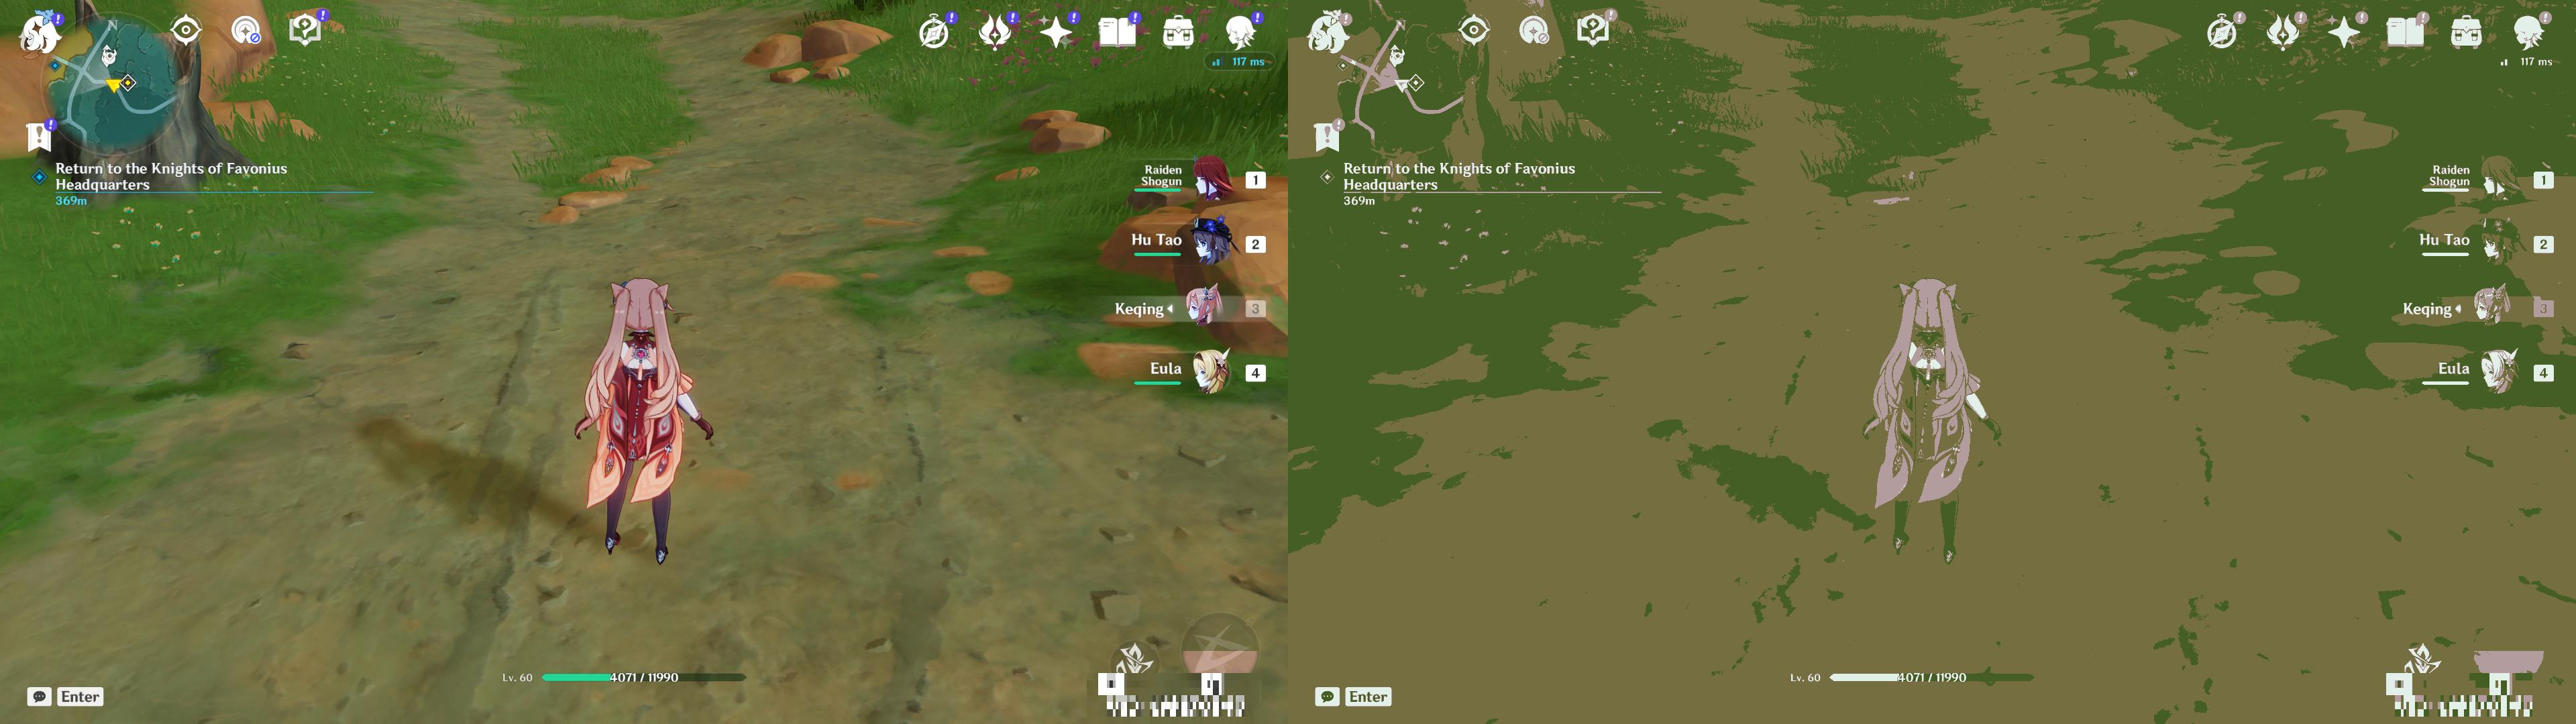

In [121]:
showarray(np.hstack([image, quant]))
# display the images and wait for a keypress
#cv2.imshow("image", np.hstack([image, quant]))
#cv2.waitKey(0)

In [126]:
from skimage import io
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np
import time
import sys

In [127]:
def _extract_features(img):
    h, w, ch = img.shape
    features = img.reshape((h*w, ch))
    return features
def _clusterize(colors, n_clusters):
    t = time.time()
    kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                             random_state=0,
                             batch_size=2**12).fit(colors)
    print('Time to clusterize: {} s'.format(time.time() - t))

    return kmeans.labels_, kmeans.cluster_centers_
def _reduce_colors(output_shape, labels, labels_colors):
    out = np.zeros((labels.size, 3))
  
    for label, color in enumerate(labels_colors):
        out[labels == label] = color

    out = out.reshape(output_shape).astype(np.uint8)
    return out

In [128]:
#img = io.imread(input_path).astype(np.float32)
img = cv2.imread('way-night.png')
colors = _extract_features(img)


In [129]:
n_colors=3

In [130]:
labels, labels_colors = _clusterize(colors, n_colors)

Time to clusterize: 0.13199424743652344 s


In [131]:
out = _reduce_colors(img.shape, labels, labels_colors)

In [132]:
type(out) 

numpy.ndarray

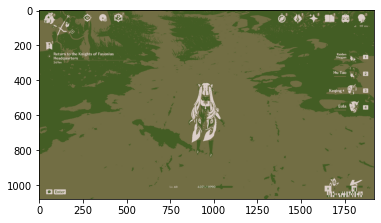

In [133]:
showarray(out)

In [134]:
from skimage import io
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np
import time
import sys
def _extract_features(img):
    h, w, ch = img.shape
    features = img.reshape((h*w, ch))
    return features
def _clusterize(colors, n_clusters):
    t = time.time()
    kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                             random_state=0,
                             batch_size=2**12).fit(colors)
    print('Time to clusterize: {} s'.format(time.time() - t))

    return kmeans.labels_, kmeans.cluster_centers_
def _reduce_colors(output_shape, labels, labels_colors):
    out = np.zeros((labels.size, 3))
  
    for label, color in enumerate(labels_colors):
        out[labels == label] = color

    out = out.reshape(output_shape).astype(np.uint8)
    return out
def color_quantization(img, n_colors=3):
    colors = _extract_features(img)
    labels, labels_colors = _clusterize(colors, n_colors)
    out = _reduce_colors(img.shape, labels, labels_colors)
    return  out

In [135]:
img = cv2.imread('way-night.png')

In [136]:
img_quantized=color_quantization(img)

Time to clusterize: 0.13099884986877441 s


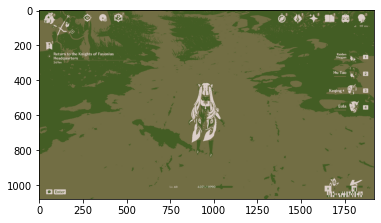

In [137]:
showarray(img_quantized)

In [138]:
#cv2.imshow("Red Image", imm)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [139]:
import cv2
import numpy as np
img = cv2.imread('way-night.png')
def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
    img_blur = cv2.GaussianBlur(thresh, (5, 5), 2)
    img_canny = cv2.Canny(img_blur, 0, 0)
    return img_canny

def get_contours(img):
    contours, _ = cv2.findContours(process(img), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    r1, r2 = sorted(contours, key=cv2.contourArea)[-3:-1]
    x, y, w, h = cv2.boundingRect(np.r_[r1, r2])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

In [140]:

get_contours(img)
cv2.imshow("img_processed", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2

def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(img_gray, 163, 255, cv2.THRESH_BINARY)
    img_canny = cv2.Canny(thresh, 0, 0)
    img_dilate = cv2.dilate(img_canny, None, iterations=7)
    return cv2.erode(img_dilate, None, iterations=7)

def get_contours(img):
    contours, _ = cv2.findContours(process(img), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)



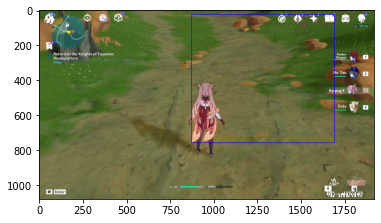

In [141]:
img = cv2.imread('way-night.png')
get_contours(img)
#cv2.imshow("img_processed", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
showarray(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


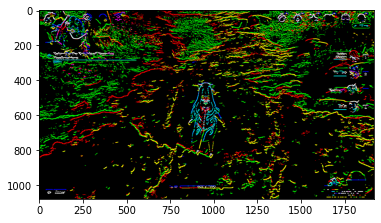

In [142]:
def process_horizontal(img):
    # Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
    #img = cv2.medianBlur(img,1)
    # Simple threshold
    ret, frame = cv2.threshold(img,100,100,cv2.THRESH_BINARY) #night/day
    # edge detection
    processed_img = cv2.Sobel(frame,cv2.CV_64F,0 ,1, ksize=5) #Horizontal Gradient
    return processed_img
img = cv2.imread('way-night.png')

pro_img = process_horizontal(img)
#cv2.imshow("img_processed", pro_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
showarray(pro_img)

In [143]:
import cv2
# read the image
image = cv2.imread('way-night.png')
# B, G, R channel splitting
blue, green, red = cv2.split(image)
# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_blue = image.copy()
cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
cv2.imshow('Contour detection using blue channels only', image_contour_blue)
cv2.waitKey(0)
cv2.imwrite('blue_channel.jpg', image_contour_blue)
cv2.destroyAllWindows()
# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_green = image.copy()
cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
cv2.imshow('Contour detection using green channels only', image_contour_green)
cv2.waitKey(0)
cv2.imwrite('green_channel.jpg', image_contour_green)
cv2.destroyAllWindows()
# detect contours using red channel and without thresholding
contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_red = image.copy()
cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
cv2.imshow('Contour detection using red channels only', image_contour_red)
cv2.waitKey(0)
cv2.imwrite('red_channel.jpg', image_contour_red)
cv2.destroyAllWindows()

In [144]:
# to actually visualize the effect of `CHAIN_APPROX_SIMPLE`, we need a proper image
# read the image
image1 = cv2.imread('way-night.png')
img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow('SIMPLE Approximation contours', image_copy2)
cv2.waitKey(0)
cv2.destroyAllWindows()
image_copy3 = image1.copy()
for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)


In [145]:
# see the results
cv2.imshow('CHAIN_APPROX_SIMPLE Point only', image_copy3)
cv2.waitKey(0)
cv2.imwrite('contour_point_simple.jpg', image_copy3)
cv2.destroyAllWindows()

In [146]:
def contour_search(image1):
    img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(img_gray1, 100, 255, cv2.THRESH_BINARY)
    contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                                   cv2.CHAIN_APPROX_SIMPLE)
    image_copy2 = image1.copy()
    cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
    return image_copy2
   

In [147]:
image_copy2=contour_search(image1)
cv2.imshow('SIMPLE Approximation contours', image_copy2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [148]:
def contour_find(image1,parameter1, parameter2):
    img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(img_gray1, parameter1, parameter2, cv2.THRESH_BINARY)
    contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                                   cv2.CHAIN_APPROX_SIMPLE)
    image_copy2 = image1.copy()
    cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
    return image_copy2

In [149]:
image1 = cv2.imread('way-day.png')
# Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
image1 = cv.medianBlur(image1,5)
image_copy2=contour_find(image1,100,255)
cv2.imshow('SIMPLE Approximation contours', image_copy2)
cv2.waitKey(0)
cv2.destroyAllWindows()

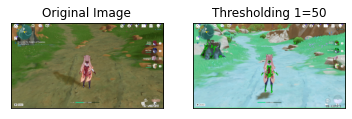

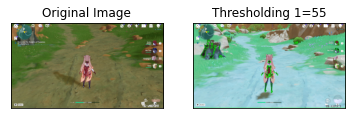

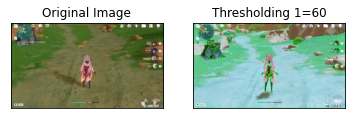

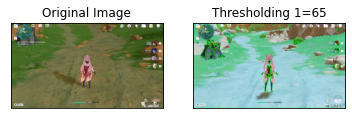

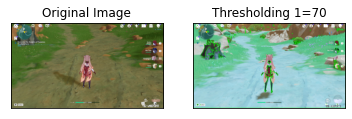

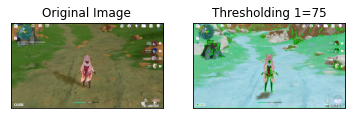

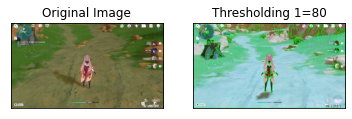

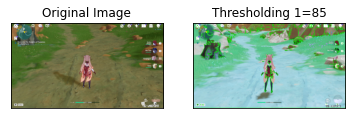

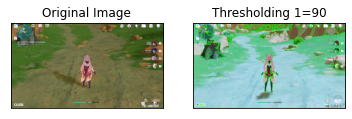

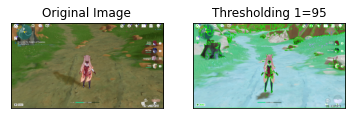

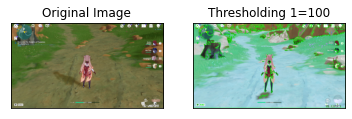

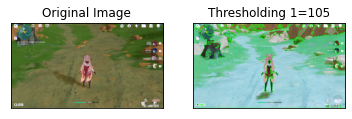

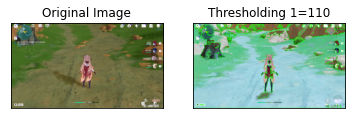

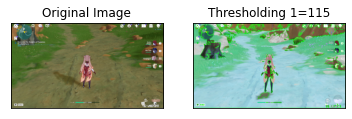

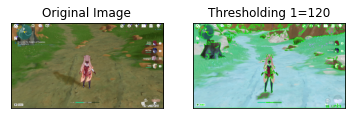

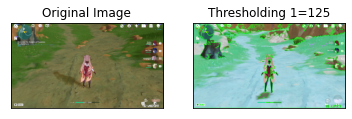

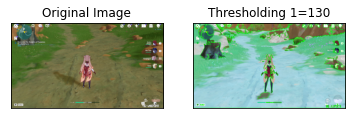

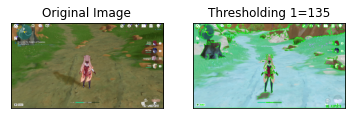

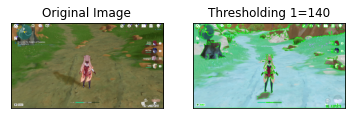

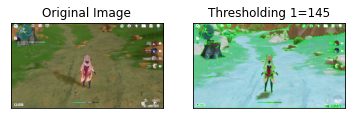

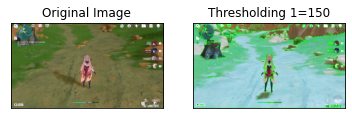

In [36]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# Simple threshold
lst = [i for i in range(50,150+1,5)]
img1 = cv2.imread('way-night.png')
for x in lst: 
    th1=contour_find(image1,x,255)
    plt.imshow(th1,'gray')
    titles = ['Original Image', 'Thresholding 1='+str(x)]
    images = [img, th1]
    for i in range(2):
        plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

In [1]:
import cv2

image = cv2.imread('way-day.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,200, 255,cv2.THRESH_BINARY_INV)[1]
cnts, h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

label = '1'
count = 0

# Get inner list of hierarchy
for layer in zip(cnts, h[0]):
    contour = layer[0]
    hierarchy = layer[1]

    # If we find new contour (not inner) reset label
    if hierarchy[1] >= 0:
        label = '1'
    # Ensure that we only have outer contour
    if count % 2 == 0:
        cv2.drawContours(image, [contour], -1, (36, 255, 12), 2)
        x,y,w,h = cv2.boundingRect(contour)
        cv2.putText(image, label, (x +50,y+ 70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (36,255,12), 3)
        label = str(int(label) * -1)

    count += 1

cv2.imshow('thresh', thresh)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
import cv2
image = cv2.imread('way-night.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,90, 255,cv2.THRESH_BINARY_INV)[1]
cnts, h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
label = '1'
count = 0
# Get inner list of hierarchy
for layer in zip(cnts, h[0]):
    contour = layer[0]
    hierarchy = layer[1]

    # If we find new contour (not inner) reset label
    if hierarchy[1] >= 0:
        label = '1'
    # Ensure that we only have outer contour
    if count % 2 == 0:
        cv2.drawContours(image, [contour], -1, (36, 255, 12), 2)
        x,y,w,h = cv2.boundingRect(contour)
        cv2.putText(image, label, (x +50,y+ 70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (36,255,12), 3)
        label = str(int(label) * -1)

    count += 1

cv2.imshow('thresh', thresh)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

### Analisis of the day

In [47]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#img = cv.imread('noisy2.png',0)
#img = load('data.npy') #Original
img = cv2.imread('way-day.png')
#img = cv2.imread('way-night.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# global thresholding
#ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret1,th1 = cv.threshold(img,200,255,cv.THRESH_BINARY) # day
#ret1,th1 = cv.threshold(img,90,255,cv.THRESH_BINARY) # night
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
# The threshold must be set to 0.
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=200)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]


## Filter of Day v=200 with Day Image

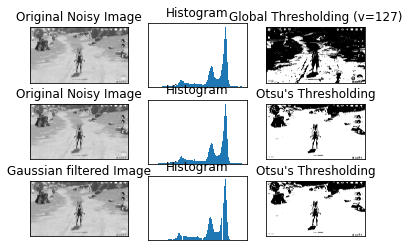

In [48]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

(array([1.0000e+00, 1.0000e+00, 5.0000e+00, 4.0000e+00, 9.0000e+00,
        1.1000e+01, 1.9000e+01, 2.2000e+01, 3.3000e+01, 3.2000e+01,
        3.6000e+01, 4.4000e+01, 5.5000e+01, 6.2000e+01, 9.3000e+01,
        1.1100e+02, 9.8000e+01, 1.0500e+02, 1.3900e+02, 1.5100e+02,
        2.0200e+02, 1.9000e+02, 1.5800e+02, 2.0200e+02, 2.8800e+02,
        3.6800e+02, 4.8800e+02, 4.0600e+02, 4.1900e+02, 3.9400e+02,
        4.3800e+02, 4.9500e+02, 4.1900e+02, 4.7700e+02, 6.2400e+02,
        1.3460e+03, 1.1290e+03, 6.0100e+02, 6.1200e+02, 5.9900e+02,
        6.3300e+02, 6.9200e+02, 6.6500e+02, 6.7200e+02, 9.0200e+02,
        8.7300e+02, 9.4000e+02, 1.0040e+03, 1.0640e+03, 1.1640e+03,
        1.2390e+03, 1.3870e+03, 1.5930e+03, 1.5560e+03, 1.5400e+03,
        1.5160e+03, 1.5520e+03, 1.5440e+03, 1.4640e+03, 1.4880e+03,
        1.6390e+03, 1.5720e+03, 1.7220e+03, 1.6180e+03, 1.6200e+03,
        1.6580e+03, 1.7850e+03, 1.9900e+03, 2.2430e+03, 2.6310e+03,
        2.4960e+03, 2.5470e+03, 2.8310e+03, 3.49

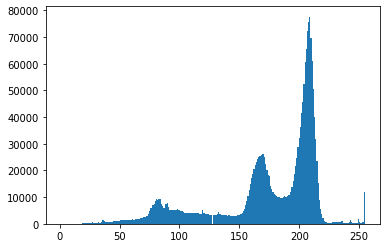

In [60]:
#plt.hist(images[3].ravel(),256)

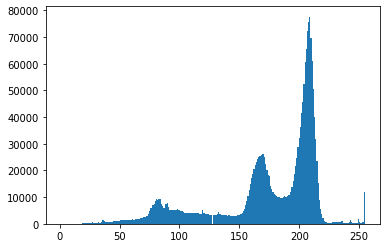

In [61]:
for i in range(1):
    plt.hist(images[3].ravel(),256)


In [64]:
len(images[3].ravel())

2073600

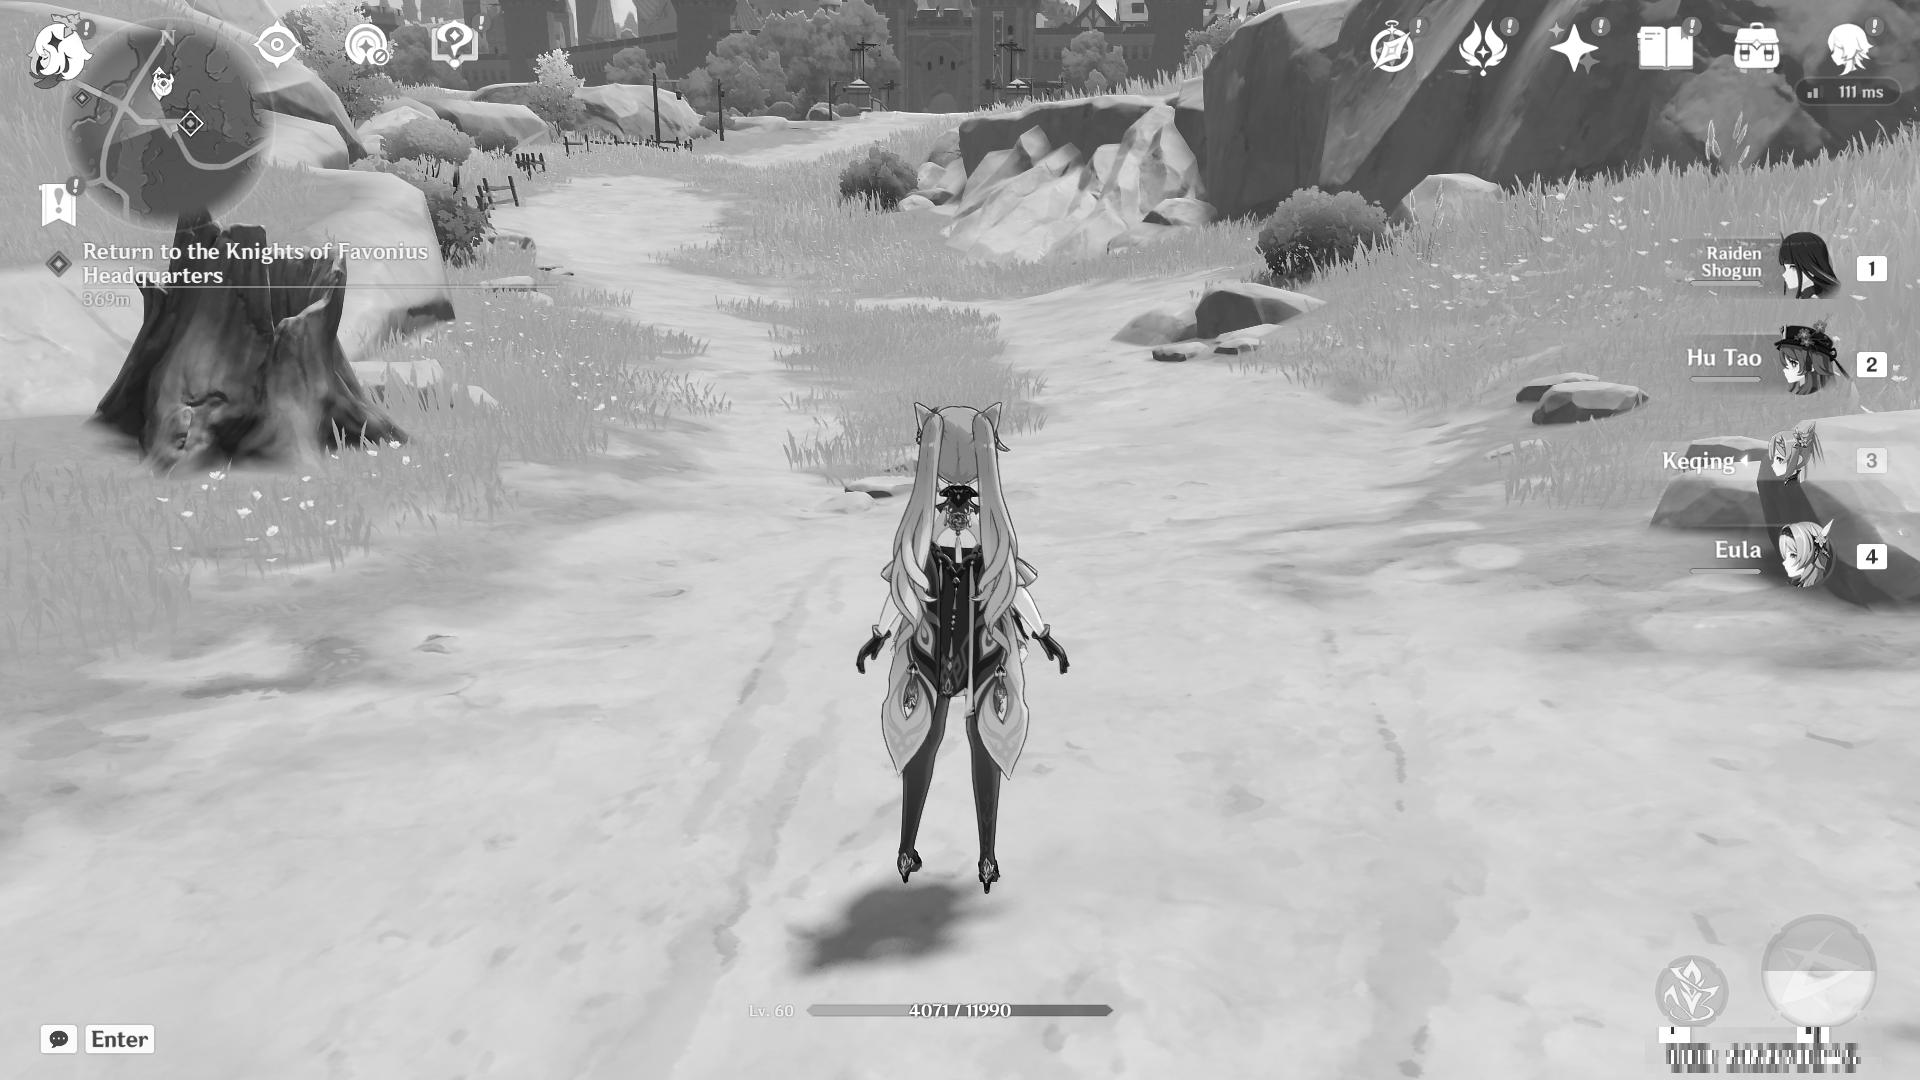

In [68]:
showarray(images[3])

In [67]:
images[3]

array([[172, 175, 175, ..., 103,  98,  99],
       [182, 183, 183, ...,  98,  95,  95],
       [186, 186, 187, ...,  93,  92,  91],
       ...,
       [209, 210, 209, ..., 208, 207, 207],
       [208, 208, 208, ..., 208, 208, 208],
       [208, 208, 209, ..., 210, 209, 209]], dtype=uint8)

(array([  2439.,  18295.,  60282., 164733., 100166.,  88087., 455993.,
        488123., 668348.,  27134.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

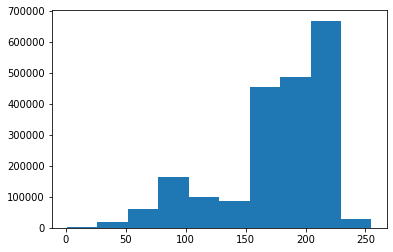

In [63]:
plt.hist(images[3].ravel())

### Analisis of the night

In [150]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#img = cv.imread('noisy2.png',0)
#img = load('data.npy') #Original
#img = cv2.imread('way-day.png')
img = cv2.imread('way-night.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# global thresholding
#ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
#ret1,th1 = cv.threshold(img,200,255,cv.THRESH_BINARY) # day
ret1,th1 = cv.threshold(img,90,255,cv.THRESH_BINARY) # night
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
# The threshold must be set to 0.
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=90)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]


## Filter of Night v=90 with Night Image

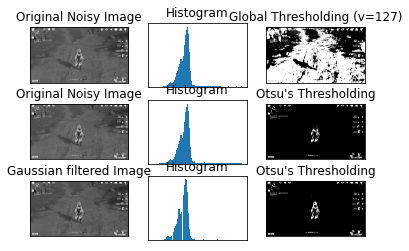

In [151]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Analisis of the Picture

## Spectrum Analisis

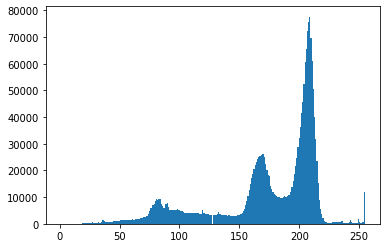

In [168]:
img = cv2.imread('way-day.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
oned=img.ravel()
for i in range(1):
    plt.hist(oned,256)

(array([  2439.,  18295.,  60282., 164733., 100166.,  88087., 455993.,
        488123., 668348.,  27134.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

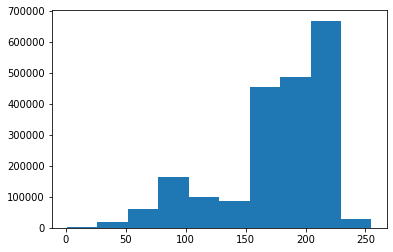

In [169]:
plt.hist(oned)

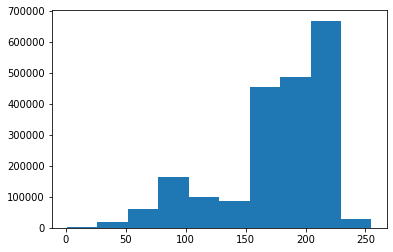

In [170]:
y, x, _ = plt.hist(oned)

In [171]:
print(x.max())
print(y.max())

255.0
668348.0


In [172]:
from matplotlib import pyplot as plt

255.0
668348.0


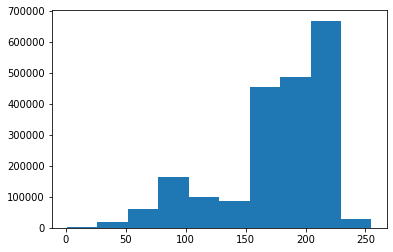

In [173]:
img = cv2.imread('way-day.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
oned=img.ravel()
y, x, _ = plt.hist(oned)
print(x.max())
print(y.max())

In [174]:
import numpy as np
img = cv2.imread('way-day.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
oned=img.ravel()
histog=np.histogram(oned)
y, x = histog[0],histog[1]
# Get the maximum element from a Numpy array
y_max = np.amax(y)
print('Y Max element from Numpy Array : ', y_max )
# Get the indices of maximum element in numpy array
result = np.where(y == np.amax(y))
print('Returned tuple of arrays :', result)
print('List of Indices of maximum element :', result[0])
position_max=result[0].item()
x_max=x[position_max]
print('x Max element from Numpy Array : ', x_max )
print('Max point (x_max,y_max) = (',  x_max ,',' ,y_max,')'  )

Y Max element from Numpy Array :  668348
Returned tuple of arrays : (array([8], dtype=int64),)
List of Indices of maximum element : [8]
x Max element from Numpy Array :  204.2
Max point (x_max,y_max) = ( 204.2 , 668348 )


255.0
1258968.0


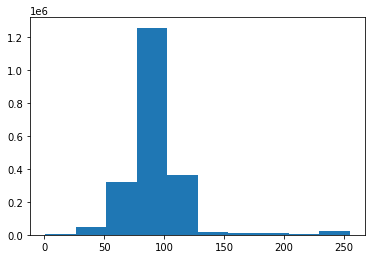

In [175]:
img = cv2.imread('way-night.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
oned=img.ravel()
y, x, _ = plt.hist(oned)
print(x.max())
print(y.max())

In [176]:
import numpy as np
img = cv2.imread('way-night.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
oned=img.ravel()
histog=np.histogram(oned)
y, x = histog[0],histog[1]
# Get the maximum element from a Numpy array
y_max = np.amax(y)
print('Y Max element from Numpy Array : ', y_max )
# Get the indices of maximum element in numpy array
result = np.where(y == np.amax(y))
print('Returned tuple of arrays :', result)
print('List of Indices of maximum element :', result[0])
position_max=result[0].item()
x_max=x[position_max]
print('x Max element from Numpy Array : ', x_max )
print('Max point (x_max,y_max) = (',  x_max ,',' ,y_max,')'  )

Y Max element from Numpy Array :  1258968
Returned tuple of arrays : (array([3], dtype=int64),)
List of Indices of maximum element : [3]
x Max element from Numpy Array :  77.19999999999999
Max point (x_max,y_max) = ( 77.19999999999999 , 1258968 )


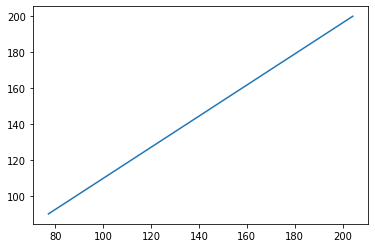

In [177]:
point1 = [77.19, 90]
point2 = [204.2, 200]
x_values = [point1[0], point2[0]]
#gather x-values
y_values = [point1[1], point2[1]]
#gather y-values
plt.plot(x_values, y_values)

In [178]:
def parmeterv(x):
    y= 0.8660735375167304*x + 23.147783639083652
    return y

In [179]:
from numpy import ones,vstack
from numpy.linalg import lstsq
points = [(77.19, 90),(204.2, 200)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

Line Solution is y = 0.8660735375167304x + 23.147783639083652


C:\Anaconda3\envs\pygta5\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


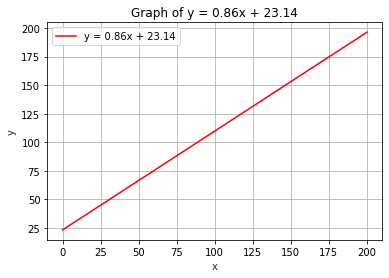

In [180]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,200,100)
y = 0.8660735375167304*x + 23.147783639083652
plt.plot(x, y, '-r', label='y = 0.86x + 23.14')
plt.title('Graph of y = 0.86x + 23.14')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Additional references:

https://learnopencv.com/contour-detection-using-opencv-python-c/

https://stackoverflow.com/questions/57061674/how-to-detect-irregular-shape-in-image-and-add-value-to-its-interior